To handle the challenge of tracking particles that elongate due to rapid movement, especially during ultrasound insonation phases, you can adapt your workflow to accommodate both the detection of spots (particles at slower speeds) and the tracking of elongated streaks (particles during rapid movement). Here's a suggested approach using Python and potentially integrating trackpy for particle tracking:

## 1. Pre-processing
Before applying tracking algorithms, it's beneficial to preprocess the images to enhance the visibility of particles and streaks.

Noise Reduction: Apply filters (e.g., Gaussian blur) to reduce noise and improve particle detection.
Contrast Enhancement: Enhance the contrast to make particles and streaks more distinguishable from the background.

## 2. Particle Detection
For particles that slow down and appear as spots, use standard particle detection techniques.

Static Particles: Use trackpy.locate to identify particles in frames where they appear as distinguishable spots. This function is efficient for spotting circular features in static images.

## 3. Streak Detection During Motion
For the phase where particles elongate due to rapid movement:

Adaptive Thresholding: Apply adaptive thresholding to distinguish elongated streaks from the background.
Custom Detection Logic: Develop custom logic to detect elongated shapes. This might involve analyzing the aspect ratio of detected features or applying morphological operations to highlight elongated structures.
Skeletal Analysis: For very elongated streaks, consider applying a skeletonization algorithm to reduce the streaks to their central lines, simplifying the tracking.

## 4. Tracking Across Frames
After identifying particles and streaks, use trackpy.link or trackpy.link_df to link features across frames.

Parameter Tuning: For trackpy.link, tune the search_range parameter to accommodate the expected movement distance between frames. This is crucial for tracking fast-moving particles that may travel significant distances between captures.
Handling Elongation: When linking, consider the elongation of particles. You might need to adjust the parameters or develop custom linking logic that accounts for the change in particle shape and size. This could involve prioritizing the continuity of motion and direction over exact shape matching.

## 5. Post-processing and Analysis
After tracking, analyze the trajectories to understand particle dynamics.

Trajectory Analysis: Use the tracked paths to analyze particle speed, direction, and behavior before, during, and after insonation.
Visualization: Visualize the trajectories overlaid on the original or processed images to verify the tracking accuracy and understand particle motions.

## 6. Implementation Tips
Experiment with Parameters: The effectiveness of tracking depends heavily on the tuning of parameters for detection and linking. Experiment with different values to find the optimal settings for your specific application.
Segmentation for Complex Cases: If particles exhibit very complex behaviors or overlap significantly, consider segmenting the image into regions and tracking particles within each region separately.
This workflow is a starting point and might need adjustments based on the specific characteristics of your images and particles. The key is to iteratively refine the detection and tracking parameters based on the observed performance on your image dataset.

### Open tiff

In [1]:
import tkinter as tk
from tkinter import filedialog
import os

# Define the starting folder path
#start_path = r'C:\Users\Talai\OneDrive - UCB-O365\Courses\Year 1\Fall Semester Aug-Dec 2020\CHEN 5840 - Independent Study\Microspheres\Particle tracking'
start_path = r'D:\Particle tracking'

root = tk.Tk()
root.withdraw()  # Hide the main window

# Bring the dialog to the front
root.lift()
root.attributes('-topmost', True)

try:
    # Allow the user to select a folder starting from the specified start path
    folder_path = filedialog.askdirectory(initialdir=start_path)

    # List all tif files in the selected folder
    tif_files = [os.path.abspath(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if f.endswith('.tif')]

    # If there's only one tif file, store its path in a string
    if len(tif_files) == 1:
        tif_file_path = tif_files[0]
        print(f"Tiff file path: {tif_file_path}")
    else:
        # If there are multiple tif files, store their paths in a list
        print(f"List of tiff files in the selected folder: {tif_files}")

except FileNotFoundError:
    print("File selection canceled by the user.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Tiff file path: E:\Particle tracking\Summer Semester Jun-Aug 2024\14JUL24\Cycle study\0 cycles\150 mVpp\240 cycles\240 cycles_1\240 cycles_MMStack_Pos0.ome.tif


# Apply median filtering to original stack

### No napari

In [2]:
import numpy as np
import cv2
import pims
import napari
#from magicgui import magicgui

# Load frames from the TIFF file
frames = pims.open(tif_file_path)

# Convert frames to grayscale
frames_gray = [cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) if frame.ndim == 3 else frame for frame in frames]

# Convert the original frames to a numpy array
frames_original_stack = np.stack(frames_gray, axis=0)

# Function to apply median filter
def apply_median_filter(frames, kernel_size=5):
    median_filtered_frames = [cv2.medianBlur(frame, kernel_size) for frame in frames]
    return np.stack(median_filtered_frames, axis=0)

# Apply median filter with a kernel size of 5 (or choose your size)
kernel_size = 3
median_filtered_frames_array = apply_median_filter(frames_gray, kernel_size)

# Debug print
print(f"Median Filter applied with kernel_size={kernel_size}")

Median Filter applied with kernel_size=3


### Napari

In [3]:
# import numpy as np
# import cv2
# import pims
# import napari
# from magicgui import magicgui

# # Load frames from the TIFF file
# frames = pims.open(tif_file_path)

# # Convert frames to grayscale
# frames_gray = [cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) if frame.ndim == 3 else frame for frame in frames]

# # Convert the original frames to a numpy array
# frames_original_stack = np.stack(frames_gray, axis=0)

# # Initialize Napari viewer
# viewer = napari.Viewer()

# # Add the original grayscale frames as an image layer with adjusted contrast limits
# viewer.add_image(frames_original_stack, name='Original Frames', contrast_limits=(0, 255))

# # Add the original grayscale frames as an image layer
# # viewer.add_image(frames_original_stack, name='Original Frames')

# # Global variable definition for median filtered frames
# median_filtered_frames = []
# median_filtered_frames_array = np.array([])  # Initialize as an empty array for now

# @magicgui(call_button="Apply Median Filter",
#           kernel_size={'widget_type': 'Slider', 'min': 1, 'max': 31, 'step': 2},
#           auto_call=False)
# def apply_median_filter(kernel_size: int = 5):
#     global median_filtered_frames, median_filtered_frames_array  # Declare global variables

#     median_filtered_frames.clear()  # Clear existing median filtered frames

#     # Apply median filter with dynamic kernel size to grayscale frames
#     for frame in frames_gray:
#         filtered_frame = cv2.medianBlur(frame, kernel_size)
#         median_filtered_frames.append(filtered_frame)  # Append the filtered frame

#     # Update the global variable with the new median filtered frames
#     median_filtered_frames_array = np.stack(median_filtered_frames, axis=0)

#     # Debug print
#     print(f"Median Filter applied with kernel_size={kernel_size}")

#     # Update or create the Napari layer for median filtered images
#     if 'Median Filtered Frames' in viewer.layers:
#         viewer.layers['Median Filtered Frames'].data = median_filtered_frames_array
#     else:
#         viewer.add_image(median_filtered_frames_array, name='Median Filtered Frames')

# # Add the widget to the Napari viewer
# viewer.window.add_dock_widget(apply_median_filter, name="Median Filter Parameters")

# # Run Napari
# napari.run()


In [4]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Flatten the array to 1D
# flattened_array = frames_original_stack.flatten()

# # Plot the histogram
# plt.hist(flattened_array, bins=256, range=(0, 255), color='gray', alpha=0.7)
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')
# plt.title('Histogram of Pixel Intensities')
# plt.show()

# Apply Gaussian filtering to median filtered stack

### No napari

In [3]:
import numpy as np
import cv2

# Function to apply adaptive Gaussian thresholding
def apply_adaptive_gaussian_thresholding(frames, block_size, C):
    thresholded_frames = []
    for frame in frames:
        if frame.ndim == 3:
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = np.uint8(frame)

        # Apply adaptive Gaussian thresholding
        thresh_frame = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, block_size, C)
        thresholded_frames.append(thresh_frame)
    
    return np.array(thresholded_frames)

# Apply the adaptive Gaussian thresholding with default parameters or customize them
thresholded_frames_array = apply_adaptive_gaussian_thresholding(median_filtered_frames_array, block_size=199, C=-11)

# Debug print
#print(f"Adaptive Gaussian Thresholding applied with block_size={block_size}, C={C}")

In [6]:
# import cv2
# import numpy as np
# import time

# def apply_adaptive_gaussian_thresholding(frame, block_size, C):
#     if frame.ndim == 3:
#         frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
#     frame = np.uint8(frame)
#     thresh_frame = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                          cv2.THRESH_BINARY, block_size, C)
#     return thresh_frame

# def display_stacks_with_scroll(original_frames, window_name_original='Original Frames', window_name_processed='Processed Frames'):
#     # Ensure block_size is odd and greater than 1
#     def ensure_odd_block_size(block_size):
#         block_size = max(3, block_size)  # Ensure greater than 1
#         return block_size if block_size % 2 == 1 else block_size + 1

#     # Create windows
#     cv2.namedWindow(window_name_original, cv2.WINDOW_NORMAL)
#     cv2.namedWindow(window_name_processed, cv2.WINDOW_NORMAL)

#     # Initialize trackbars
#     cv2.createTrackbar('Frame', window_name_original, 0, len(original_frames)-1, lambda x: None)
#     block_size = cv2.createTrackbar('Block Size', window_name_processed, 11, 255, lambda x: None)  # Max 255, OpenCV requires callback
#     C_value = cv2.createTrackbar('C', window_name_processed, 2, 255, lambda x: None)  # Max 255, OpenCV requires callback

#     prev_block_size = cv2.getTrackbarPos('Block Size', window_name_processed)
#     prev_C_value = cv2.getTrackbarPos('C', window_name_processed)

#     # Process all frames initially
#     thresholded_frames_array = [apply_adaptive_gaussian_thresholding(frame, ensure_odd_block_size(prev_block_size), prev_C_value) for frame in original_frames]

#     while True:
#         # Get the current position of the trackbars
#         frame_index = cv2.getTrackbarPos('Frame', window_name_original)
#         current_block_size = ensure_odd_block_size(cv2.getTrackbarPos('Block Size', window_name_processed))
#         current_C_value = cv2.getTrackbarPos('C', window_name_processed)

#         # Check if parameters have changed and reprocess if they have
#         if current_block_size != prev_block_size or current_C_value != prev_C_value:
#             thresholded_frames_array = [apply_adaptive_gaussian_thresholding(frame, current_block_size, current_C_value) for frame in original_frames]
#             prev_block_size = current_block_size
#             prev_C_value = current_C_value

#         # Display the frames
#         cv2.imshow(window_name_original, original_frames[frame_index].astype(np.uint8))
#         cv2.imshow(window_name_processed, thresholded_frames_array[frame_index].astype(np.uint8))

#         # Break the loop when 'q' is pressed
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cv2.destroyAllWindows()

# # Example call, assuming 'median_filtered_frames_array' contains your stack of original frames
# display_stacks_with_scroll(median_filtered_frames_array)


### Napari

In [ ]:
# import numpy as np
# import cv2
# import napari
# from magicgui import magicgui

# # Initialize Napari viewer
# viewer = napari.Viewer()

# # Assuming 'frames_filtered_stack' is defined and contains your stack of original frames
# viewer.add_image(median_filtered_frames_array, name='Original Frames', contrast_limits=(0, 255))

# # Assuming 'frames_filtered_stack' is defined and contains your stack of original frames
# # viewer.add_image(median_filtered_frames_array, name='Original Frames')

# # Global variable definition
# thresholded_frames = []
# thresholded_frames_array = np.array([])  # Initialize as an empty array for now

# @magicgui(call_button="Apply Gaussian Thresholding",
#           block_size={'widget_type': 'Slider', 'min': 1, 'max': 201, 'step': 2},
#           C={'widget_type': 'Slider', 'min': -10, 'max': 10},
#           auto_call=False)
# def apply_adaptive_gaussian_thresholding(block_size: int=199, C: int=-9):
#     global thresholded_frames, thresholded_frames_array  # Include thresholded_frames_array as global

#     thresholded_frames.clear()  # Clear existing data

#     for frame in median_filtered_frames_array:
#         if frame.ndim == 3:
#             frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
#         frame = np.uint8(frame)
        
#         # Apply adaptive Gaussian thresholding
#         thresh_frame = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#                                              cv2.THRESH_BINARY, block_size, C)
#         thresholded_frames.append(thresh_frame)  # Append the correctly processed frame
    
#     # Update the global variable
#     thresholded_frames_array = np.array(thresholded_frames)

#     # Debug print
#     print(f"Adaptive Gaussian Thresholding applied with block_size={block_size}, C={C}")

#     # Update or create the Napari layer for thresholded images
#     if 'Adaptive Threshold' in viewer.layers:
#         viewer.layers['Adaptive Threshold'].data = thresholded_frames_array
#     else:
#         viewer.add_image(thresholded_frames_array, name='Adaptive Threshold')

# # Add the widget to the Napari viewer
# viewer.window.add_dock_widget(apply_adaptive_gaussian_thresholding, name="Adaptive Gaussian Thresholding Parameters")

# # Run Napari
# napari.run()

### OpenCV, figure out how to move ruler when zoomed in?

In [4]:
import cv2
import numpy as np

# Pixel size in micrometers
pixel_size_um = 1.3

# Initialize global variables for each window
points = {
    'Processed Frames': {'start': None, 'end': None, 'dragging': False, 'drag_point': None, 'last_pos': None},
    'Original Frames': {'start': None, 'end': None, 'dragging': False, 'drag_point': None, 'last_pos': None}
}

# Assuming thresholded_frames_array and median_filtered_frames_array are defined

def nothing(x):
    pass

def select_points(event, x, y, flags, params):
    window_name = params['window']  # Identify the window where the event occurred
    data = points[window_name]  # Get the specific data for this window

    if event == cv2.EVENT_LBUTTONDOWN:
        if data['start'] and data['end']:
            if np.linalg.norm(np.array(data['start']) - np.array([x, y])) < 10:
                data['drag_point'] = 'start'
            elif np.linalg.norm(np.array(data['end']) - np.array([x, y])) < 10:
                data['drag_point'] = 'end'
            else:
                data['last_pos'] = (x, y)
                data['dragging'] = True
        else:
            if not data['start']:
                data['start'] = (x, y)
            elif not data['end']:
                data['end'] = (x, y)

    elif event == cv2.EVENT_MOUSEMOVE:
        if data['drag_point'] == 'start':
            data['start'] = (x, y)
        elif data['drag_point'] == 'end':
            data['end'] = (x, y)
        elif data['dragging']:
            dx, dy = x - data['last_pos'][0], y - data['last_pos'][1]
            data['start'] = (data['start'][0] + dx, data['start'][1] + dy)
            data['end'] = (data['end'][0] + dx, data['end'][1] + dy)
            data['last_pos'] = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        data['dragging'] = False
        data['drag_point'] = None

# Create windows
cv2.namedWindow('Processed Frames', cv2.WINDOW_NORMAL)
cv2.namedWindow('Original Frames', cv2.WINDOW_NORMAL)

# Create trackbars for both windows
cv2.createTrackbar('Scroll Processed', 'Processed Frames', 0, len(thresholded_frames_array) - 1, nothing)
cv2.createTrackbar('Scroll Original', 'Original Frames', 0, len(median_filtered_frames_array) - 1, nothing)

# Set mouse callbacks with additional parameters
cv2.setMouseCallback('Processed Frames', select_points, {'window': 'Processed Frames'})
cv2.setMouseCallback('Original Frames', select_points, {'window': 'Original Frames'})

while True:
    # Get the current position of the trackbars for each window
    processed_frame_index = cv2.getTrackbarPos('Scroll Processed', 'Processed Frames')
    original_frame_index = cv2.getTrackbarPos('Scroll Original', 'Original Frames')

    # Retrieve the current frame for each window using its own trackbar position
    processed_frame = thresholded_frames_array[processed_frame_index].copy()
    original_frame = median_filtered_frames_array[original_frame_index].copy()

    # Handle drawing for each window
    # In the while loop, where you draw the line for the ruler
    # In the while loop, where you handle drawing for each window
    # In the while loop, where you handle drawing for each window
    for win in ['Processed Frames', 'Original Frames']:
        frame = processed_frame if win == 'Processed Frames' else original_frame
        if len(frame.shape) == 2:
            frame = cv2.cvtColor(frame.astype(np.uint8), cv2.COLOR_GRAY2BGR)
        
        data = points[win]
        if data['start'] and data['end']:
            # Draw the line for the ruler
            cv2.line(frame, data['start'], data['end'], (0, 255, 0), 2)
    
            # Calculate the distance in pixels and display it
            distance_px = np.linalg.norm(np.array(data['start']) - np.array(data['end']))
            distance_um = distance_px * pixel_size_um
            text = f'Measured Distance: {distance_um:.2f} um'
            font = cv2.FONT_HERSHEY_SIMPLEX
            position = (10, 30)
            font_scale = 0.7
            font_color = (255, 255, 255)
            line_type = 2
            cv2.putText(frame, text, position, font, font_scale, font_color, line_type)
            
            # Draw circles at the endpoints
            circle_radius = 5  # You can adjust the size
            circle_color = (0, 0, 255)  # Red color for visibility
            circle_thickness = 2  # Thickness of the circle outline
            cv2.circle(frame, data['start'], circle_radius, circle_color, circle_thickness)
            cv2.circle(frame, data['end'], circle_radius, circle_color, circle_thickness)

        # Display the updated frame
        cv2.imshow(win, frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [5]:
# import cv2
# import numpy as np
# import pandas as pd

# # Initialize global variables
# start_point = None
# end_point = None
# is_dragging = False
# dragging_endpoint = None
# last_mouse_pos = None

# # Pixel size in micrometers
# pixel_size_um = 1.3

# # Assuming thresholded_frames_array is already defined and contains thresholded frames

# def nothing(x):
#     # Callback function for the trackbar, does nothing but is required by OpenCV
#     pass

# def select_points(event, x, y, flags, params):
#     global start_point, end_point, is_dragging, dragging_endpoint, last_mouse_pos
#     if event == cv2.EVENT_LBUTTONDOWN:
#         if start_point and end_point:
#             # Check if the click is near the endpoints
#             if np.linalg.norm(np.array(start_point) - np.array([x, y])) < 10:
#                 dragging_endpoint = 'start'
#             elif np.linalg.norm(np.array(end_point) - np.array([x, y])) < 10:
#                 dragging_endpoint = 'end'
#             elif cv2.pointPolygonTest(np.array([start_point, end_point]), (x, y), True) > -10:
#                 # Allow dragging the ruler if clicked near it
#                 is_dragging = True
#                 last_mouse_pos = (x, y)
#         else:
#             if not start_point:
#                 start_point = (x, y)
#             elif not end_point:
#                 end_point = (x, y)
#     elif event == cv2.EVENT_MOUSEMOVE:
#         if dragging_endpoint == 'start':
#             start_point = (x, y)
#         elif dragging_endpoint == 'end':
#             end_point = (x, y)
#         elif is_dragging and last_mouse_pos:
#             dx, dy = x - last_mouse_pos[0], y - last_mouse_pos[1]
#             start_point = (start_point[0] + dx, start_point[1] + dy)
#             end_point = (end_point[0] + dx, end_point[1] + dy)
#             last_mouse_pos = (x, y)
#     elif event == cv2.EVENT_LBUTTONUP:
#         is_dragging = False
#         dragging_endpoint = None

# cv2.namedWindow('Frame', cv2.WINDOW_NORMAL)
# cv2.createTrackbar('Scroll', 'Frame', 0, len(thresholded_frames_array) - 1, nothing)

# cv2.setMouseCallback('Frame', select_points)

# while True:
#     # Get the current position of the trackbar, i.e., the frame index to display
#     frame_index = cv2.getTrackbarPos('Scroll', 'Frame')
    
#     # Retrieve the current frame from the array
#     frame = thresholded_frames_array[frame_index].copy()
    
#     # If the frame is grayscale, convert it to BGR for display
#     if len(frame.shape) == 2:
#         frame = cv2.cvtColor(frame.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    
#     # Display the current frame
#     cv2.imshow('Frame', frame)
    
#     # Break the loop if the user presses 'q'
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Clean up and close the window
# cv2.destroyAllWindows()

In [6]:
# import cv2
# import numpy as np

# def display_stacks_with_scroll(original_frames, processed_frames, window_name_original='Original Frames', window_name_processed='Processed Frames'):
#     assert original_frames.shape[0] == processed_frames.shape[0], "The number of original and processed frames must be equal"
    
#     # Create windows
#     cv2.namedWindow(window_name_original, cv2.WINDOW_NORMAL)
#     cv2.namedWindow(window_name_processed, cv2.WINDOW_NORMAL)

#     # Initialize trackbars
#     def nothing(x):
#         pass
#     cv2.createTrackbar('Frame', window_name_original, 0, len(original_frames)-1, nothing)
#     cv2.createTrackbar('Frame', window_name_processed, 0, len(processed_frames)-1, nothing)

#     while True:
#         # Get the current position of the trackbars
#         original_index = cv2.getTrackbarPos('Frame', window_name_original)
#         processed_index = cv2.getTrackbarPos('Frame', window_name_processed)

#         # Display the frames
#         cv2.imshow(window_name_original, original_frames[original_index].astype(np.uint8))
#         cv2.imshow(window_name_processed, processed_frames[processed_index].astype(np.uint8))

#         # Break the loop when 'q' is pressed
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cv2.destroyAllWindows()

# # Assuming 'median_filtered_frames_array' contains your stack of original frames
# # And 'thresholded_frames_array' is the stack of processed frames
# display_stacks_with_scroll(median_filtered_frames_array, thresholded_frames_array)

In [7]:
### Apply mean thresholding

In [8]:
# import numpy as np
# import cv2
# import napari
# from magicgui import magicgui

# # Initialize Napari viewer
# viewer = napari.Viewer()

# # Assuming 'median_filtered_frames_array' is defined and contains your stack of median filtered frames
# viewer.add_image(median_filtered_frames_array, name='Median Filtered Frames')

# # Global variable definition for thresholded frames
# thresholded_frames = []
# thresholded_frames_array = np.array([])  # Initialize as an empty array for now

# @magicgui(call_button="Apply Mean Thresholding",
#           block_size={'widget_type': 'Slider', 'min': 3, 'max': 200, 'step': 2},
#           C={'widget_type': 'Slider', 'min': -10, 'max': 10},
#           auto_call=False)
# def apply_adaptive_mean_thresholding(block_size: int=11, C: int=2):
#     global thresholded_frames, thresholded_frames_array  # Declare global variables

#     thresholded_frames.clear()  # Clear existing data

#     for frame in median_filtered_frames_array:
#         if frame.ndim == 3:
#             frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
#         frame = np.uint8(frame)
        
#         # Apply adaptive mean thresholding
#         thresh_frame = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
#                                              cv2.THRESH_BINARY, block_size, C)
#         thresholded_frames.append(thresh_frame)  # Append the correctly processed frame
    
#     # Update the global variable
#     thresholded_frames_array = np.array(thresholded_frames)

#     # Debug print
#     print(f"Adaptive Mean Thresholding applied with block_size={block_size}, C={C}")

#     # Update or create the Napari layer for thresholded images
#     if 'Adaptive Threshold' in viewer.layers:
#         viewer.layers['Adaptive Threshold'].data = thresholded_frames_array
#     else:
#         viewer.add_image(thresholded_frames_array, name='Adaptive Threshold')

# # Add the widget to the Napari viewer
# viewer.window.add_dock_widget(apply_adaptive_mean_thresholding, name="Adaptive Mean Thresholding Parameters")

# # Run Napari
# napari.run()


### Locate particle spots and features

In [9]:
import trackpy as tp
tp.quiet()

In [10]:
# This is a computationally intensive step and should be done once outside the function

# # Define your thresholds
# mass_threshold = 500
# signal_threshold = 10
# size_threshold = 2

# # Apply multiple filters
# filtered_particles = particles[
#     (particles['mass'] > mass_threshold) &
#     (particles['signal'] > signal_threshold) &
#     (particles['size'] > size_threshold)
# ]

diameter = 25  # Set initial diameter for detection
particles = tp.batch(thresholded_frames_array, diameter=diameter, invert=False, processes='auto')

## Draw spots on thresholded_frames_array using OpenCV

In [11]:
import cv2
import numpy as np
import pandas as pd

# Assuming thresholded_frames_array is a numpy array with shape (num_frames, height, width)
# and 'particles' is a pandas DataFrame containing the spots for each frame

# Create a window with a named trackbar
cv2.namedWindow('Frame', cv2.WINDOW_NORMAL)
cv2.createTrackbar('Scroll', 'Frame', 0, len(thresholded_frames_array) - 1, lambda x: None)

def draw_spots_on_frame(frame, particles):
    # Overlay detected spots onto the frame as outlines
    for index, particle in particles.iterrows():
        position = (int(particle['x']), int(particle['y']))
        # Draw a circle with a thickness of 1 pixel for an outline
        cv2.circle(frame, position, 3, (0, 0, 255), thickness=1)
    return frame

while True:
    # Get the current position of the trackbar
    frame_index = cv2.getTrackbarPos('Scroll', 'Frame')

    # Convert the frame to 3 channels if it's not already
    frame = thresholded_frames_array[frame_index].copy()
    if len(frame.shape) == 2:
        frame = cv2.cvtColor(frame.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Filter the particles for the current frame
    current_frame_particles = particles[particles['frame'] == frame_index]

    # Draw the spots on the frame
    frame_with_spots = draw_spots_on_frame(frame, current_frame_particles)

    # Display the frame with the spots
    cv2.imshow('Frame', frame_with_spots)

    # Wait for the 'q' key to be pressed to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

### Overlay particle spots in napari

In [12]:
# import numpy as np
# import trackpy as tp
# import napari
# from magicgui import magicgui

# # Assume 'thresholded_frames_array' contains your stack of thresholded images

# # Disable verbose output for cleaner execution
# # tp.quiet()

# # Initialize napari viewer
# viewer = napari.Viewer()

# # Function to draw circles around detected particles based on the current frame
# def draw_circles(frame_number, diameter):
#     # Remove the existing layer of circles if it exists
#     if 'Detected Particles' in viewer.layers:
#         viewer.layers.remove('Detected Particles')
    
#     # Get the particles for the current frame
#     current_frame_particles = particles[particles['frame'] == frame_number]

#     if current_frame_particles.empty:
#         return  # If there are no particles, there's nothing to draw
    
#     # Calculate the radius from the diameter
#     radius = diameter / 2.0
    
#     # Create a list of bounding box corners for each ellipse
#     ellipses = [
#         np.array([[row['y'] - radius, row['x'] - radius],
#                   [row['y'] - radius, row['x'] + radius],
#                   [row['y'] + radius, row['x'] + radius],
#                   [row['y'] + radius, row['x'] - radius]])
#         for index, row in current_frame_particles.iterrows()
#     ]
    
#     # Add the shapes layer to the napari viewer with thicker, darker edges
#     if ellipses:
#         viewer.add_shapes(ellipses, shape_type='ellipse', edge_color='darkred', edge_width=2, name='Detected Particles')

# @magicgui(call_button="Update Detection",
#           diameter={'widget_type': 'Slider', 'min': 5, 'max': 50, 'step': 1})
# def detect_particles(diameter=25):
#     # Print the updated diameter
#     print(f"Updating particle detection with diameter: {diameter}")
    
#     # Re-run particle detection with the new diameter
#     global particles  # Use global to modify the particles variable defined outside the function
#     particles = tp.batch(thresholded_frames_array, diameter=diameter, invert=False, processes='auto')
    
#     # Update the visualization for the current frame with the newly detected particles
#     frame_number = viewer.dims.current_step[0]
#     draw_circles(frame_number, diameter)

# # Connect the diameter adjustment to the shapes layer update
# detect_particles.diameter.changed.connect(
#     lambda event: draw_circles(viewer.dims.current_step[0], event.value)
# )

# # Add the original thresholded frames to napari for comparison
# viewer.add_image(thresholded_frames_array, name='Thresholded Frames')

# # Add the magicgui widget to the viewer
# viewer.window.add_dock_widget(detect_particles, area='right')

# # Update the particle layer whenever the viewer frame changes
# @viewer.dims.events.current_step.connect
# def on_current_step(event):
#     frame_number = viewer.dims.current_step[0]
#     # Use the current diameter from the `detect_particles` widget
#     current_diameter = detect_particles.diameter.value
#     draw_circles(frame_number, current_diameter)

# # Call the draw_circles function initially with the first frame
# #draw_circles(0, diameter)
# draw_circles(0, diameter)

# # Run Napari
# napari.run()

### Plot histogram of particle spot features

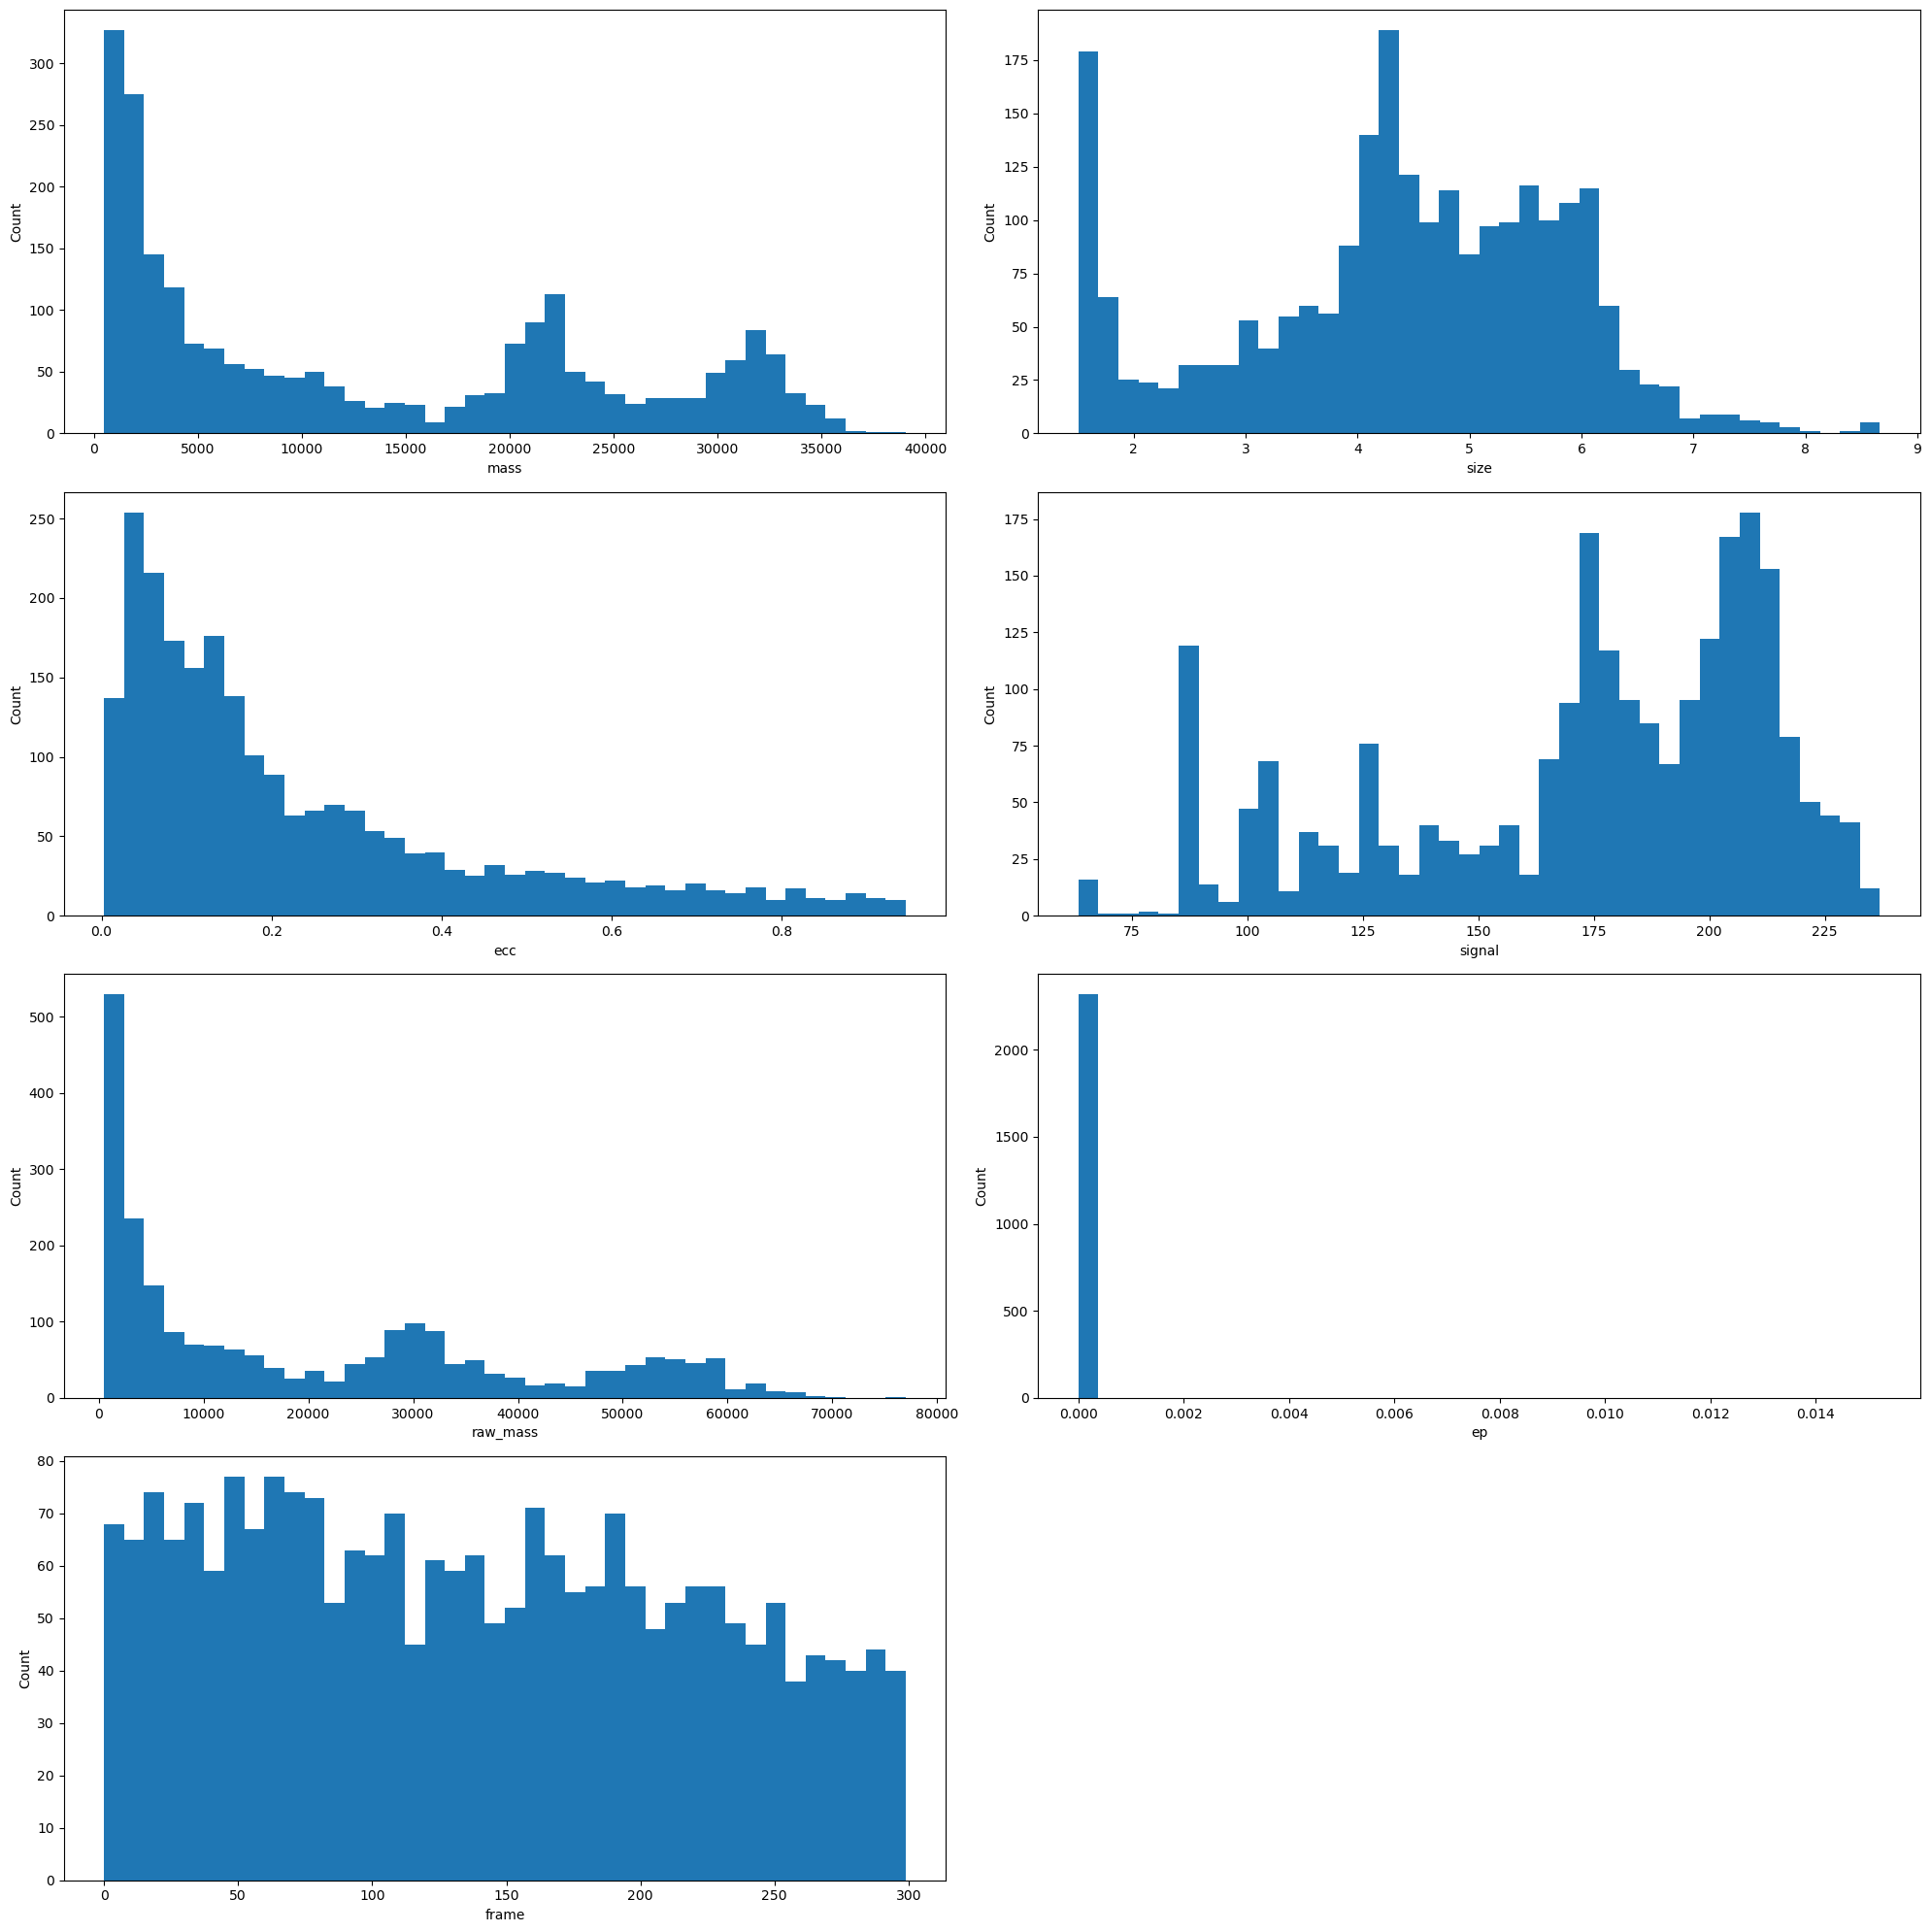

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'particles' is a pandas DataFrame with your data
# Example: particles = pd.DataFrame(data)

# Get the list of columns to plot, excluding 'y' and 'x'
columns_to_plot = [col for col in particles.columns if col not in ['y', 'x']]

# Calculate the layout dimensions
num_columns = 2  # We want two histograms per row
num_rows = len(columns_to_plot) // num_columns + (len(columns_to_plot) % num_columns > 0)

# Create the subplot grid with a larger figure size
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
axs = axs.flatten()  # Flatten the array to easily use a single index

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot):
    ax = axs[i]  # Select the subplot
    ax.hist(particles[column], bins=40)  # Plot the histogram, 20 is original default
    ax.set_xlabel(column)  # Set the x-axis label to the column name
    ax.set_ylabel('Count')  # Set the y-axis label

# Hide any extra subplots if the number of columns is odd
if len(columns_to_plot) % num_columns:
    axs[-1].axis('off')  # Hide the last subplot if it's unused

plt.tight_layout()  # Adjust the layout to prevent overlap

# Maximize the plot window (this works for some backends like TkAgg and Qt5Agg)
try:
    plt.get_current_fig_manager().window.state('zoomed')
except:
    try:
        plt.get_current_fig_manager().resize(*plt.get_current_fig_manager().window.maxsize())
    except:
        pass  # If the backend does not support this, just ignore

plt.show()  # Display the plot

### Generate covariance plots

In [226]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'particles' is a pandas DataFrame with your relevant data
# # Create a copy of the DataFrame to work on
# particles_copy = particles.copy()

# # Replace inf and -inf with NaN in the copy
# particles_copy.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Drop rows with NaN values in the copy if necessary
# particles_copy.dropna(inplace=True)

# # Select only the relevant columns for covariance plots from the copy
# relevant_features = particles_copy[['raw_mass', 'mass', 'size', 'signal']]

# # Create a PairGrid instance with the copy of the data
# g = sns.PairGrid(relevant_features)

# # Map the plots to the grid
# g.map_upper(sns.scatterplot)  # Scatter plots on the upper triangle
# g.map_lower(sns.kdeplot, cmap="Blues_d")  # KDE plots on the lower triangle
# g.map_diag(sns.histplot, kde=False)  # Histograms on the diagonal

# # Calculate and annotate correlation coefficient in upper triangle
# for i, j in zip(*np.triu_indices_from(g.axes, k=1)):
#     pearson_corr = relevant_features.iloc[:, [i, j]].dropna().corr().iloc[0, 1]
#     g.axes[i, j].annotate(f'ρ = {pearson_corr:.2f}',
#                           xy=(0.1, 0.9), xycoords='axes fraction',
#                           ha='center', va='center',
#                           fontsize=9)

# # Set the x-axis labels and tick values to be visible for each subplot
# for ax in g.axes.flatten():
#     ax.xaxis.set_tick_params(labelbottom=True)
#     ax.yaxis.set_tick_params(labelleft=True)

# # Adjust the figure size and display the plots
# g.fig.set_size_inches(12, 12)
# plt.show()


In [227]:
#particles

### Filtering spots based on covariance plots

In [14]:
particles_spot_filtered = particles.query('size > 2')
#particles_spot_filtered = particles
#particles_spot_filtered = particles

#print(particles_spot_filtered)

### Subpixel accuracy bias

In [15]:
#particles_spot_filtered

C:\ProgramData\anaconda3\envs\particle_tracker_real\Lib\site-packages\trackpy\plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

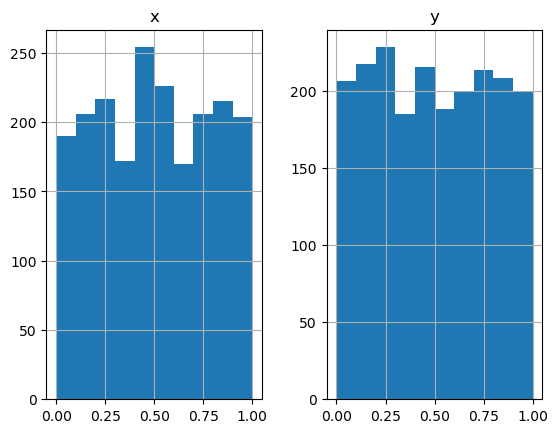

In [16]:
#Subpixel accuracy refers to the precision of locating features (like particles) within an image at a resolution finer than the size of one pixel. 

tp.subpx_bias(particles_spot_filtered )

In [12]:
particles_spot_filtered

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,178.811957,341.192386,3674.336927,2.033508,0.171337,222.487954,4080.0,0.0,0
1,489.404098,873.934877,20801.215542,4.210249,0.071131,209.345206,28560.0,0.0,0
2,772.426483,280.547210,37433.363558,8.005351,0.189056,163.345586,80580.0,0.0,0
3,1235.346179,931.247500,7039.819268,2.527143,0.063742,239.385773,8160.0,0.0,0
4,1418.449803,1341.404456,21488.393526,5.117714,0.103674,200.896296,32385.0,0.0,0
...,...,...,...,...,...,...,...,...,...
4280,1953.152338,1973.199466,18595.399437,6.086208,0.616142,206.257765,27540.0,0.0,299
4281,1973.867428,1938.750793,22772.771895,6.473973,0.580260,194.073762,36465.0,0.0,299
4282,1993.512452,2016.407590,19080.148700,6.392933,0.529760,211.479481,28305.0,0.0,299
4283,2009.040436,1972.659459,4950.186362,7.034811,0.500671,147.948608,6630.0,0.0,299


### Link features into particle trajectories using predictive linking

In [13]:
#trajectories_filtered

In [14]:
# import pandas as pd
# import trackpy as tp
# from trackpy.predict import NearestVelocityPredict

# # Assuming you have already loaded your particle data into a DataFrame called 'particles'

# # Split the particles DataFrame into individual DataFrames, each representing a frame
# frames = [particles_spot_filtered[particles_spot_filtered['frame'] == frame] for frame in particles_spot_filtered['frame'].unique()]

# # Create an instance of NearestVelocityPredict
# predictor = NearestVelocityPredict()

# # Link particles across frames with predictive search
# search_range = 200  # Example search range, adjust based on your dataset
# memory = 8 # Allows particles to disappear for up to 8 frames
# adaptive_step = 0.95 # Reduce search_range by multiplying it by this factor.
# particles_linked = pd.concat(predictor.link_df_iter(frames, search_range=search_range, memory=memory, adaptive_step=adaptive_step))

# # Filter linked particles
# particles_linked_filtered = tp.filter_stubs(particles_linked, 3)

# # Compare the number of particles in the unfiltered and filtered data.
# print('Before:', particles_linked['particle'].nunique())
# print('After:', particles_linked_filtered['particle'].nunique())

### Link features into particle trajectories using trackpy adaptive + predictive search linking

In [15]:
# import pandas as pd
# import trackpy as tp
# from trackpy.predict import NearestVelocityPredict

# # Assuming you have already loaded your particle data into a DataFrame called 'particles'

# # Split the particles DataFrame into individual DataFrames, each representing a frame
# frames = [particles_spot_filtered[particles_spot_filtered['frame'] == frame] for frame in particles_spot_filtered['frame'].unique()]

# # Create an instance of NearestVelocityPredict
# predictor = NearestVelocityPredict()

# # Link particles across frames with predictive search
# search_range = 200  # Example search range, adjust based on your dataset
# memory = 4 # Allows particles to disappear for up to 8 framesadaptive_step = 0.95 # Reduce search_range by multiplying it by this factor.
# adaptive_stop = 2.0  # Minimum allowed search range
# adaptive_step = 0.95  # Reduction factor for search range upon subnet issues
# particles_linked = pd.concat(predictor.link_df_iter(frames, search_range=search_range, memory=memory, adaptive_stop=adaptive_stop, adaptive_step=adaptive_step))

# # Filter linked particles
# particles_linked_filtered = tp.filter_stubs(particles_linked, 3)

# # Compare the number of particles in the unfiltered and filtered data.
# print('Before:', particles_linked['particle'].nunique())
# print('After:', particles_linked_filtered['particle'].nunique())


### Link features into particle trajectories using trackpy regular search linking

In [16]:
# import pandas as pd
# import trackpy as tp

# # Assuming you have already loaded your particle data into a DataFrame called 'particles_spot_filtered'

# # Parameters for linking
# search_range = 200  # Example search range, adjust based on your dataset
# memory = 8  # Allows particles to disappear for up to specified number of frames
# adaptive_stop = None  # Minimum allowed search range
# adaptive_step = 0.95  # Reduction factor for search range upon subnet issues

# # Link particles across frames
# particles_linked = tp.link_df(
#     f=particles_spot_filtered, 
#     search_range=search_range, 
#     memory=memory, 
#     adaptive_stop=adaptive_stop, 
#     adaptive_step=adaptive_step
#     processes = 'auto'
# )

In [17]:
### Delete particle spots

In [17]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html, Dash
from dash.dependencies import Input, Output, State

app = Dash(__name__)

# Assuming you have a DataFrame called particles_spot_filtered with the particle data
# Create a color map for each unique frame
frame_ids = particles_spot_filtered['frame'].unique()
color_map = {fid: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, fid in enumerate(frame_ids)}

def create_figure():
    trajectory_traces = []
    for fid in particles_spot_filtered['frame'].unique():
        frame_data = particles_spot_filtered[particles_spot_filtered['frame'] == fid]
        hover_text = ['Frame: {}<br>Mass: {}'.format(fid, mass) for mass in frame_data['mass']]
        trace = go.Scattergl(
            x=frame_data['x'],
            y=frame_data['y'],
            mode='markers',
            marker=dict(size=5, color=color_map[fid]),
            name=f'Frame {fid}',
            showlegend=False,
            customdata=frame_data[['frame', 'x', 'y']],
            hoverinfo='text',
            text=hover_text
        )
        trajectory_traces.append(trace)

    layout = go.Layout(
        title='Particle Positions',
        xaxis=dict(title='X Position'),
        yaxis=dict(title='Y Position', autorange='reversed'),
        dragmode='select',
        width=800,
        height=700
    )

    return go.Figure(data=trajectory_traces, layout=layout)

app.layout = html.Div([
    dcc.Graph(
        id='particle-plot',
        figure=create_figure(),
        config={'scrollZoom': True}
    ),
    html.Button('Delete Selected Points', id='delete-points-button', n_clicks=0),
    html.Div(id='selected-points', style={'display': 'none'})
])

@app.callback(
    Output('particle-plot', 'figure'),
    [Input('delete-points-button', 'n_clicks')],
    [State('particle-plot', 'selectedData')]
)
def update_figure(n_clicks, selectedData):
    if selectedData:
        selected_points = [(point['x'], point['y']) for point in selectedData['points']]
        selected_points_df = pd.DataFrame(selected_points, columns=['x', 'y'])

        global particles_spot_filtered
        particles_spot_filtered = particles_spot_filtered.merge(selected_points_df, on=['x', 'y'], how='left', indicator=True)
        particles_spot_filtered = particles_spot_filtered[particles_spot_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

    return create_figure()

if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

In [18]:
# import seaborn as sns
# import plotly.express as px

# # Assuming particles_spot_filtered is your DataFrame
# # Calculate the proximity using trackpy
# def apply_proximity(group):
#     return tp.static.proximity(group, pos_columns=['x', 'y'])

# # Applying trackpy to each frame
# proximity_results = particles_spot_filtered.groupby('frame').apply(apply_proximity)
# proximity_results = proximity_results.reset_index(drop=True)

# # Combine proximity data back with the original DataFrame
# particles_with_proximity = particles_spot_filtered.copy()
# particles_with_proximity['proximity'] = proximity_results['proximity']

# # Calculate median proximity
# median_proximity = particles_with_proximity['proximity'].median()
# print(f"Median proximity: {median_proximity}")

# # Plotting histogram of proximities using Plotly
# fig = px.histogram(particles_with_proximity, x='proximity', nbins=100, title='Histogram of Nearest Neighbor Distances')
# fig.update_layout(xaxis_title='Distance to Nearest Neighbor', yaxis_title='Frequency')
# fig.show()

In [19]:
# # Set a threshold for proximity to filter out particles
# distance_threshold = 60  # Adjust based on your specific needs

# # Filter particles based on proximity
# particles_spot_filtered = particles_with_proximity[particles_with_proximity['proximity'] > distance_threshold]

# # Review the filtered DataFrame
# print(particles_spot_filtered)

### Link and Plot trajectories on x, y map

In [24]:
#tp.quiet()

# Initial parameters for tracking
search_range_initial = 15 #15 orig
memory_initial = 2

# Incremental adjustments
search_range_increment = 10
memory_increment = 1

# Maximum allowed values to prevent excessive computation
max_search_range_um = 300
max_search_range = max_search_range_um / 1.3 # divided by pixel size
max_memory = 30

tp.linking.Linker.MAX_SUB_NET_SIZE = 100  # Adjust the value as needed

# Number of frames that particle is missing which flags concerns
specified_memory_threshold = memory_initial

def adjust_and_link(particles, search_range, memory, search_range_increment, memory_increment, max_search_range, max_memory, specified_memory_threshold):
    # Initialize the linked DataFrame
    linked_particles = None
    
    # Flags to check if max values are reached
    max_search_range_reached = False
    max_memory_reached = False

    # Flag to check for missing particles
    particles_missing = True

    while particles_missing and (not max_search_range_reached or not max_memory_reached):
        # Attempt to link with current parameters
        linked_particles = tp.link_df(particles, search_range=search_range, memory=memory)

        # Check if particles are missing
        particles_missing = check_missing_particles(linked_particles, specified_memory_threshold)

        if particles_missing:
            # Only increment if missing particles are detected
            if search_range + search_range_increment <= max_search_range:
                search_range += search_range_increment
            else:
                max_search_range_reached = True
            
            if memory + memory_increment <= max_memory:
                memory += memory_increment
            else:
                max_memory_reached = True
        else:
            # Exit the loop if no particles are missing
            break
    
    # Return the linked DataFrame after adjustments
    return linked_particles

def check_missing_particles(linked_particles, specified_memory_threshold):
    # Determine the maximum frame number for each particle
    max_frame_per_particle = linked_particles.groupby('particle')['frame'].max()
    
    # Determine the minimum frame number for each particle
    min_frame_per_particle = linked_particles.groupby('particle')['frame'].min()
    
    # Calculate the span of frames each particle appears in
    frame_span = max_frame_per_particle - min_frame_per_particle + 1
    
    # Count the actual number of frames each particle was found in
    frame_count = linked_particles.groupby('particle')['frame'].nunique()
    
    # Calculate the difference, which indicates missing frames for each particle
    missing_frames = frame_span - frame_count
    
    # Check if any particle is missing for more than the specified threshold of frames
    missing_too_long = (missing_frames > specified_memory_threshold).any()
    
    return missing_too_long

def track_particles_incrementally(particles_spot_filtered):
    # Assume particles_spot_filtered is a DataFrame that includes 'x', 'y', 'frame'
    # No need to apply tp.batch again, as we're starting with pre-detected particles
    
    # Sort particles_spot_filtered by frame to ensure chronological processing
    particles_spot_filtered = particles_spot_filtered.sort_values(by='frame')
    
    # Initialize parameters for dynamic adjustment
    search_range = search_range_initial
    memory = memory_initial
    
    # Directly link particles using dynamic parameters
    # Note: adjust_and_link function logic will need to be integrated here
    # since we're now working with a single comprehensive DataFrame
    linked_particles = adjust_and_link(
    particles=particles_spot_filtered,
    search_range=search_range_initial,  # Use search_range_initial as the starting search_range
    memory=memory_initial,              # Use memory_initial as the starting memory
    search_range_increment=search_range_increment,
    memory_increment=memory_increment,
    max_search_range=max_search_range,
    max_memory=max_memory,
    specified_memory_threshold=specified_memory_threshold
)
    
    return linked_particles

In [25]:
# Assuming particles_spot_filtered is your DataFrame containing detected particles
# tp.quiet() made it faster
linked_particles = track_particles_incrementally(particles_spot_filtered)

In [26]:
import ipywidgets as widgets
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

filtered_particles = None  # Define the global variable outside the functions
#tp.quiet()

# Global dictionary to hold truncation ranges for each particle
particle_truncation_ranges = {}

def plot_trajectories(data, microns_per_pixel, line_width, selected_particle=-1, truncate_at=None):
    """
    Plots the x, y trajectories of each unique particle in the dataset.
    Highlights the selected particle and ensures all particle labels are visible. Truncates the track
    of the selected particle based on the truncate_at value.
    
    Parameters:
    - data: DataFrame containing particle tracking data.
    - microns_per_pixel (float): Scale factor to convert pixels to microns.
    - line_width (float): Width of the trajectory lines.
    - selected_particle (int): Identifier for the particle to highlight. If -1, no specific highlighting is applied.
    - truncate_at (int): The index to truncate the selected particle's track at. If None, no truncation is applied.
    """
    plt.clf()  # Clear the current figure
    fig, ax = plt.subplots(figsize=(20, 10))
    unique_particles = data['particle'].unique()
    color_map = matplotlib.cm.get_cmap('viridis')
    colors = color_map(np.linspace(0, 1, len(unique_particles)))

    legend_handles = []
    legend_labels = []

    for i, particle in enumerate(unique_particles):
        particle_data = data[data['particle'] == particle]
    
        # Check if this particle's truncation range is stored and use it
        if particle in particle_truncation_ranges:
            start_idx, end_idx = particle_truncation_ranges[particle]
            particle_data = particle_data.iloc[start_idx:end_idx]
        elif particle == selected_particle and truncate_at is not None:
            start_idx, end_idx = truncate_at
            particle_data = particle_data.iloc[start_idx:end_idx]
        
        x_positions = particle_data['x'] * microns_per_pixel
        y_positions = particle_data['y'] * microns_per_pixel
        color = colors[i] if particle != selected_particle else 'red'  # Highlight color for selected particle
        opacity = 0.2 if selected_particle != -1 and particle != selected_particle else 1  # Dim others if a particle is selected
        
        # Plot each particle's trajectory
        line, = ax.plot(x_positions, y_positions, linestyle='-', linewidth=line_width, color=color, alpha=opacity)
        
        #Add particle to the legend
        if particle != selected_particle:
            legend_handles.append(line)
            legend_labels.append(f'Particle {particle}')
        
        # Annotate the last point of each trajectory for every particle, adjust style if it is the selected one
        if particle == selected_particle:
            ax.annotate(f'{particle}', xy=(x_positions.iloc[-1], y_positions.iloc[-1]), 
                        xytext=(3, 3), textcoords='offset points', color='black', weight='bold', fontsize=16)
        else:
            ax.annotate(f'{particle}', xy=(x_positions.iloc[-1], y_positions.iloc[-1]), 
                        xytext=(3, 3), textcoords='offset points', color=color, alpha=opacity, fontsize=14)
    
    ax.invert_yaxis()
    ax.set_xlabel('X Position (µm)')
    ax.set_ylabel('Y Position (µm)')
    
    # Create a separate legend for the particles on the right side of the plot
    ax.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)

def interactive_plot(particles_linked, microns_per_pixel=1.3, line_width=2):
    """
    Creates an interactive plot with sliders for search_range, memory, stub_threshold, displacement_threshold, and min_spots.
    """
    
    filtered_particles = None
    particle_truncation_ranges = {}
    
    # Define a style object for the sliders
    slider_style = {'description_width': 'initial'}  # 'initial' makes the description width adjust to the text
    
    # Define sliders for the parameters with the style
    stub_threshold_slider = widgets.IntSlider(value=3, min=0, max=50, step=1, description='Stub Threshold:', style=slider_style)
    displacement_threshold_slider = widgets.FloatSlider(value=0, min=0, max=200, step=5, description='Displacement Threshold:', style=slider_style)
    min_spots_slider = widgets.IntSlider(value=3, min=1, max=20, step=1, description='Minimum Spots per Trajectory:', style=slider_style)
    total_distance_slider = widgets.FloatSlider(value=0, min=0, max=1000, step=10, description='Total Distance Traveled:', style=slider_style)

    # Define a slider for particle selection
    particle_selection_slider = widgets.IntSlider(value=-1, min=-1, max=len(particles_linked['particle'].unique())-1, step=1, description='Highlight Particle:', style={'description_width': 'initial'})

    # Placeholder initialization
    track_truncation_slider = widgets.IntRangeSlider(
        value=[0, 1],  # Initial range, will be dynamically updated
        min=0,  # Minimum always starts at 0
        max=1,  # Placeholder maximum, will be dynamically updated soon
        step=1,
        description='Truncate Track:',
        style={'description_width': 'initial'}
    )

    def filter_trajectories_by_spots(particle_data, stub_threshold, min_spots):
        """
        Filter out trajectories that have fewer spots than the minimum spots threshold.
        
        Parameters:
        - particles_data: DataFrame containing the linked particle data.
        - stub_threshold: The stub threshold to use with tp.filter_stubs.
        - min_spots: The minimum number of spots a particle must have to be included.
        
        Returns:
        - A DataFrame containing only the particles with spots greater than or equal to min_spots.
        """
        particles_with_enough_spots = tp.filter_stubs(particle_data, stub_threshold) # Filters out particles than appear less than stub_threshold defined frames
        particles_filtered = particles_with_enough_spots.groupby('particle').filter(lambda x: len(x) >= min_spots) # Retains particles with more than min number of spots
        return particles_filtered

    def calculate_overall_displacement(particle_data):
        """
        Calculate the total displacement for each particle.
    
        Parameters:
        - particles_data: DataFrame containing the linked particle data with 'particle', 'x', and 'y' columns.
    
        Returns:
        - A Series with the particle identifier as the index and its corresponding total displacement.
        """
        # Calculate initial and final positions for each particle
        initial_positions = particle_data.groupby('particle').first()[['x', 'y']]
        final_positions = particle_data.groupby('particle').last()[['x', 'y']]
    
        # Calculate displacement for each particle
        displacements = np.sqrt((final_positions['x'] - initial_positions['x'])**2 + 
                                (final_positions['y'] - initial_positions['y'])**2)
        return displacements

    def calculate_total_distance(particle_data):
        """
        Calculate the total distance traveled by each particle.
        
        Parameters:
        - particle_data: DataFrame containing the x and y positions for a single particle.
        
        Returns:
        - total_distance: The total distance traveled by the particle.
        """
        # Work on a copy of the particle_data to avoid modifying the original DataFrame
        particle_data_copy = particle_data.copy()
        
        # Calculate the differences between consecutive x and y positions for each particle
        particle_data_copy['x_diff'] = particle_data_copy['x'].diff().fillna(0)
        particle_data_copy['y_diff'] = particle_data_copy['y'].diff().fillna(0)
        
        # Calculate the Euclidean distance for each step
        particle_data_copy['step_distance'] = np.sqrt(particle_data_copy['x_diff']**2 + particle_data_copy['y_diff']**2)
        
        # Sum the step distances to get the total distance traveled
        total_distance = particle_data_copy['step_distance'].sum()
        return total_distance

    # Define the function to dynamically update the Track Truncation Slider's range
    def update_track_truncation_range(*args):
        selected_particle_id = particle_selection_slider.value
        if selected_particle_id >= 0:  # Check if a valid particle is selected
            particle_id = particles_linked['particle'].unique()[selected_particle_id]
            track_length = len(particles_linked[particles_linked['particle'] == particle_id])
            track_truncation_slider.max = track_length
            
            # Check if the selected particle has a stored truncation range
            if particle_id in particle_truncation_ranges:
                start_idx, end_idx = particle_truncation_ranges[particle_id]
                track_truncation_slider.value = [start_idx, end_idx]  # Set the slider to the stored range
            else:
                track_truncation_slider.value = [0, track_length]  # Set the slider to cover the full track range
        else:
            track_truncation_slider.max = 1  # Reset to a minimal range if no valid selection
            track_truncation_slider.value = [0, 1]

    # Link the update function to the particle selection slider's changes
    particle_selection_slider.observe(update_track_truncation_range, names='value')

    def plot_updater(stub_threshold, displacement_threshold, min_spots, total_distance_traveled, highlighted_particle, truncate_position):
        # Existing filtering logic...
        """
        Updates the plot based on the selected slider values.
        """
    
        global filtered_particles, particle_truncation_ranges  # Declare filtered_particles as global
        #print(f"Stub Threshold: {stub_threshold}, Min Spots: {min_spots}")
        # Use dynamic parameter adjustment as an initial attempt for linking
        # If not successful or for further manual adjustments, use slider values
        # Assume particles_spot_filtered is pre-processed data ready for linking

        #filtered_particles = None  # Reset filtered_particles to None
        #particle_truncation_ranges.clear()  # Clear particle_truncation_ranges dictionary
        
        # Filter out trajectories with fewer spots than the min_spots threshold
        particles_linked_filtered = filter_trajectories_by_spots(particles_linked, stub_threshold, min_spots)
    
        # Calculate total displacement for each particle
        overall_displacements = calculate_overall_displacement(particles_linked_filtered)
    
        # Filter particles by overall displacement using the displacement_threshold slider value
        particles_with_enough_displacement = overall_displacements[overall_displacements > displacement_threshold].index
        particles_linked_filtered = particles_linked_filtered[particles_linked_filtered['particle'].isin(particles_with_enough_displacement)]
    
        # After calculating total distances
        total_distances = particles_linked_filtered.groupby('particle').apply(lambda group: calculate_total_distance(group[['x', 'y']]))
        
        # Filter based on the slider value for total distance traveled
        particles_to_keep = total_distances[total_distances > total_distance_traveled].index
        filtered_particles = particles_linked_filtered[particles_linked_filtered['particle'].isin(particles_to_keep)]
    
        # Adjust the call to plot_trajectories to include the highlighted_particle
        highlighted_particle_id = particles_linked['particle'].unique()[highlighted_particle] if highlighted_particle >= 0 else -1
    
        # Ensure highlighted_particle_id and truncate_position are correctly determined
        # If a particle is selected and truncation is applied, update the dictionary
        if highlighted_particle >= 0:
            particle_id = particles_linked['particle'].unique()[highlighted_particle]
            particle_truncation_ranges[particle_id] = truncate_position
        
        # Call plot_trajectories with the appropriate parameters
        plot_trajectories(filtered_particles, microns_per_pixel, line_width, selected_particle=highlighted_particle_id, truncate_at=truncate_position)
        
        # Print slider values
        print("Stub Threshold:", stub_threshold)
        print("Displacement Threshold:", displacement_threshold)
        print("Minimum Spots per Trajectory:", min_spots)
        print("Total Distance Traveled:", total_distance_traveled)

    #  # Immediately display the initial plot before any interaction
    # initial_highlighted_particle = -1  # Use default or initial value
    # initial_stub_threshold = 3
    # initial_displacement_threshold = 0
    # initial_min_spots = 3
    # initial_total_distance_traveled = 0
    
    # # Calculate the initial plot without waiting for slider interaction
    # # This can be a direct call to your plot function or a call to the updater function with initial values
    # # If you're calling plot_updater, make sure to adapt it for direct invocation without slider interaction
    # plot_updater(initial_stub_threshold, initial_displacement_threshold, initial_min_spots, initial_total_distance_traveled, initial_highlighted_particle)
    
    # Display the sliders and update the plot when the values change
    # Update the UI to include the new particle selection slider
    # Include the track_truncation_slider in your interactive output

    # Update the UI to include the new track truncation slider
    ui = widgets.VBox([
        stub_threshold_slider, 
        displacement_threshold_slider,
        min_spots_slider,
        total_distance_slider,
        particle_selection_slider,
        track_truncation_slider  # Include the truncation slider in the UI
    ])

    out = widgets.interactive_output(plot_updater, {
        'stub_threshold': stub_threshold_slider, 
        'displacement_threshold': displacement_threshold_slider,
        'min_spots': min_spots_slider,
        'total_distance_traveled': total_distance_slider,
        'highlighted_particle': particle_selection_slider,
        'truncate_position': track_truncation_slider  # Add the truncation slider to the interactive output
    })
    
    display(ui, out)

    return filtered_particles  # Returning filtered_particles 

In [27]:
# Call the function with the initial DataFrame
interactive_plot(linked_particles)

Output()

In [28]:
#particles_linked_filtered

In [29]:
#particles_spot_filtered

In [30]:
#thresholded_frames_array

In [31]:
### Reset index of filtered_particles dataframe

In [32]:
# Ensure filtered_particles is initialized and is a DataFrame
if filtered_particles is not None:
    # It's not necessary to reset the index for this operation, but it depends on your further needs

    # Apply truncation based on particle_truncation_ranges
    for particle, (start_idx, end_idx) in particle_truncation_ranges.items():
        if particle in filtered_particles['particle'].unique():
            # Select the particle data
            particle_data = filtered_particles[filtered_particles['particle'] == particle]

            # Apply truncation using iloc for index-based selection
            truncated_particle_data = particle_data.iloc[start_idx:end_idx]

            # Remove the old particle data from filtered_particles
            filtered_particles = filtered_particles[filtered_particles['particle'] != particle]

            # Append the truncated data
            filtered_particles = pd.concat([filtered_particles, truncated_particle_data], ignore_index=True)

# Optional: Reset index after concatenation to ensure a clean DataFrame index
filtered_particles.reset_index(drop=True, inplace=True)    

# Copy filtered_particles
filtered_particles_truncated = filtered_particles.copy()

In [33]:
filtered_particles_truncated

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,783.702543,1010.553896,22150.774765,4.340935,0.043582,205.225332,31110.0,0.0,0,0
1,1311.489779,328.963316,3228.456662,6.160597,0.300537,151.884828,4080.0,0.0,0,1
2,1587.417750,1626.913510,3198.622143,2.990186,0.138896,172.678584,3825.0,0.0,0,2
3,1755.022335,1512.921240,22303.563669,4.741139,0.113916,202.513103,32640.0,0.0,0,3
4,1879.143762,1313.751381,7854.615369,3.221400,0.275338,230.539470,9435.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...
1733,1363.747777,533.753078,4838.933229,6.157100,0.529155,148.113722,6885.0,0.0,298,10
1734,1393.760221,298.578258,26070.180392,4.917094,0.129386,193.709804,39270.0,0.0,299,7
1735,775.951470,952.155624,20214.823529,4.103393,0.066653,211.168627,27540.0,0.0,299,0
1736,1368.706528,517.040171,4470.290196,4.084472,0.326397,187.058824,5865.0,0.0,299,10


### Plot trajectories on plotly x,y map and allow for point deletion

In [34]:
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
# import dash
# from dash import dcc, html, Dash, Input, Output, State

# app = Dash(__name__)

# # Assuming you have a DataFrame called filtered_particles_truncated with the particle data
# # For demonstration purposes, let's create a sample DataFrame
# # You should replace this with your actual DataFrame load or definition
# # Placeholder for your DataFrame loading or creation here

# # Function to create a color map that includes all particle IDs
# def create_color_map(particle_ids):
#     return {pid: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, pid in enumerate(particle_ids)}

# def create_figure():
#     trajectory_traces = []
#     particle_ids = filtered_particles_truncated['particle'].unique()
#     color_map = create_color_map(particle_ids)  # Create color map dynamically

#     for pid in particle_ids:
#         particle_data = filtered_particles_truncated[filtered_particles_truncated['particle'] == pid]
#         hover_text = ['Particle: {}<br>Frame: {}'.format(pid, frame) for frame in particle_data['frame']]
#         trace = go.Scattergl(
#             x=particle_data['x'],
#             y=particle_data['y'],
#             mode='lines+markers',
#             line=dict(color=color_map[pid], width=1),
#             marker=dict(size=3, color=color_map[pid]),
#             name=f'Particle {pid}',
#             showlegend=False,
#             customdata=particle_data[['particle', 'frame']],
#             hoverinfo='text',
#             text=hover_text
#         )
#         trajectory_traces.append(trace)
    
#     layout = go.Layout(
#         title='Particle Positions',
#         xaxis=dict(title='X Position'),
#         yaxis=dict(title='Y Position', autorange='reversed'),
#         dragmode='select',
#         width=1200,
#         height=700
#     )
    
#     return go.Figure(data=trajectory_traces, layout=layout)

# app.layout = html.Div([
#     dcc.Graph(
#         id='particle-plot',
#         figure=create_figure(),
#         config={'scrollZoom': True}
#     ),
#     html.Button('Delete Selected Points', id='delete-points-button', n_clicks=0),
#     html.Button('Delete Entire Particle', id='delete-particle-button', n_clicks=0),
#     html.Div(id='selected-points', style={'display': 'none'})
# ])

# @app.callback(
#     Output('particle-plot', 'figure'),
#     [Input('delete-points-button', 'n_clicks'),
#      Input('delete-particle-button', 'n_clicks')],
#     [State('particle-plot', 'selectedData')]
# )
# def update_figure(n_clicks_points, n_clicks_particles, selectedData):
#     ctx = dash.callback_context
#     if not ctx.triggered:
#         return create_figure()

#     button_id = ctx.triggered[0]['prop_id'].split('.')[0]
#     if selectedData:
#         if button_id == 'delete-points-button':
#             # Deletes only selected points
#             points_to_delete = [(point['customdata'][0], point['customdata'][1]) for point in selectedData['points']]
#             points_df = pd.DataFrame(points_to_delete, columns=['particle', 'frame'])
#             global filtered_particles_truncated
#             filtered_particles_truncated = filtered_particles_truncated.merge(points_df, on=['particle', 'frame'], how='left', indicator=True)
#             filtered_particles_truncated = filtered_particles_truncated[filtered_particles_truncated['_merge'] == 'left_only'].drop(columns=['_merge'])
#         elif button_id == 'delete-particle-button':
#             # Deletes entire particles if any of their points are selected
#             selected_particles = set(point['customdata'][0] for point in selectedData['points'])
#             filtered_particles_truncated = filtered_particles_truncated[~filtered_particles_truncated['particle'].isin(selected_particles)]
    
#     return create_figure()

# if __name__ == '__main__':
#     app.run_server(debug=True, port=8051)


In [35]:
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
# from dash import dcc, html, Dash, Input, Output, State, callback_context

# app = Dash(__name__)

# # Placeholder for DataFrame history
# df_history = []
# df_redo_history = []  # Stack for redo actions

# def create_color_map(particle_ids):
#     return {pid: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, pid in enumerate(particle_ids)}

# def create_figure():
#     trajectory_traces = []
#     particle_ids = filtered_particles_truncated['particle'].unique()
#     color_map = create_color_map(particle_ids)
#     for pid in particle_ids:
#         particle_data = filtered_particles_truncated[filtered_particles_truncated['particle'] == pid]
#         hover_text = ['Particle: {}<br>Frame: {}'.format(pid, frame) for frame in particle_data['frame']]
#         trace = go.Scattergl(
#             x=particle_data['x'],
#             y=particle_data['y'],
#             mode='lines+markers',
#             line=dict(color=color_map[pid], width=1),
#             marker=dict(size=3, color=color_map[pid]),
#             name=f'Particle {pid}',
#             showlegend=False,
#             customdata=particle_data[['particle', 'frame']],
#             hoverinfo='text',
#             text=hover_text
#         )
#         trajectory_traces.append(trace)
#     layout = go.Layout(
#         title='Particle Positions',
#         xaxis=dict(title='X Position'),
#         yaxis=dict(title='Y Position', autorange='reversed'),
#         dragmode='select',
#         width=1200,
#         height=700
#     )
#     return go.Figure(data=trajectory_traces, layout=layout)

# app.layout = html.Div([
#     dcc.Graph(
#         id='particle-plot',
#         figure=create_figure(),
#         config={'scrollZoom': True}
#     ),
#     html.Button('Delete Selected Points', id='delete-points-button', n_clicks=0),
#     html.Button('Delete Entire Particle', id='delete-particle-button', n_clicks=0),
#     html.Button('Link Selected Trajectories', id='link-trajectories-button', n_clicks=0),
#     html.Button('Undo', id='undo-button', n_clicks=0),
#     html.Button('Redo', id='redo-button', n_clicks=0),  # Add redo button
#     html.Div(id='selected-points', style={'display': 'none'})
# ])

# @app.callback(
#     Output('particle-plot', 'figure'),
#     [Input('delete-points-button', 'n_clicks'),
#      Input('delete-particle-button', 'n_clicks'),
#      Input('link-trajectories-button', 'n_clicks'),
#      Input('undo-button', 'n_clicks'),
#      Input('redo-button', 'n_clicks')],
#     [State('particle-plot', 'selectedData')]
# )
# def update_figure(n_clicks_points, n_clicks_particles, n_clicks_link, n_clicks_undo, n_clicks_redo, selectedData):
#     global filtered_particles_truncated
#     ctx = callback_context
#     button_id = ctx.triggered[0]['prop_id'].split('.')[0]
    
#     if button_id == 'undo-button' and df_history:
#         df_redo_history.append(filtered_particles_truncated.copy())
#         filtered_particles_truncated = df_history.pop()
#         return create_figure()

#     if button_id == 'redo-button' and df_redo_history:
#         df_history.append(filtered_particles_truncated.copy())
#         filtered_particles_truncated = df_redo_history.pop()
#         return create_figure()

#     if selectedData:
#         df_redo_history.clear()
#         df_history.append(filtered_particles_truncated.copy())
        
#         if button_id == 'delete-points-button':
#             points_to_delete = [(point['customdata'][0], point['customdata'][1]) for point in selectedData['points']]
#             points_df = pd.DataFrame(points_to_delete, columns=['particle', 'frame'])
#             filtered_particles_truncated = filtered_particles_truncated.merge(points_df, on=['particle', 'frame'], how='left', indicator=True)
#             filtered_particles_truncated = filtered_particles_truncated[filtered_particles_truncated['_merge'] == 'left_only'].drop(columns=['_merge'])
#         elif button_id == 'delete-particle-button':
#             selected_particles = set(point['customdata'][0] for point in selectedData['points'])
#             filtered_particles_truncated = filtered_particles_truncated[~filtered_particles_truncated['particle'].isin(selected_particles)]
#         elif button_id == 'link-trajectories-button':
#             selected_particles = set(point['customdata'][0] for point in selectedData['points'])
#             # Determine the particle with the earliest appearing frame
#             min_frame_particle = min(selected_particles, key=lambda p: filtered_particles_truncated[filtered_particles_truncated['particle'] == p]['frame'].min())
#             # Update all selected particles to have this particle's ID
#             for pid in selected_particles:
#                 filtered_particles_truncated.loc[filtered_particles_truncated['particle'] == pid, 'particle'] = min_frame_particle
#     return create_figure()

# if __name__ == '__main__':
#     app.run_server(debug=True, port=8051)



In [36]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import dcc, html, Dash, Input, Output, State, callback_context

app = Dash(__name__)

# Placeholder for DataFrame history
df_history = []
df_redo_history = []  # Stack for redo actions

def create_color_map(particle_ids):
    return {pid: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, pid in enumerate(particle_ids)}

def create_figure():
    trajectory_traces = []
    particle_ids = filtered_particles_truncated['particle'].unique()
    color_map = create_color_map(particle_ids)
    for pid in particle_ids:
        particle_data = filtered_particles_truncated[filtered_particles_truncated['particle'] == pid]
        hover_text = ['Particle: {}<br>Frame: {}'.format(pid, frame) for frame in particle_data['frame']]
        trace = go.Scattergl(
            x=particle_data['x'],
            y=particle_data['y'],
            mode='lines+markers',
            line=dict(color=color_map[pid], width=1),
            marker=dict(size=3, color=color_map[pid]),
            name=f'Particle {pid}',
            showlegend=False,
            customdata=particle_data[['particle', 'frame']],
            hoverinfo='text',
            text=hover_text
        )
        trajectory_traces.append(trace)
    layout = go.Layout(
        title='Particle Positions',
        xaxis=dict(title='X Position'),
        yaxis=dict(title='Y Position', autorange='reversed'),
        dragmode='select',
        width=1200,
        height=600
    )
    return go.Figure(data=trajectory_traces, layout=layout)

app.layout = html.Div([
    dcc.Graph(
        id='particle-plot',
        figure=create_figure(),
        config={'scrollZoom': True}
    ),
    html.Button('Delete Selected Points', id='delete-points-button', n_clicks=0),
    html.Button('Delete Entire Particle', id='delete-particle-button', n_clicks=0),
    html.Button('Link Selected Trajectories', id='link-trajectories-button', n_clicks=0),
    html.Button('Unlink Selected Points', id='unlink-points-button', n_clicks=0),
    html.Button('Undo', id='undo-button', n_clicks=0),
    html.Button('Redo', id='redo-button', n_clicks=0),  # Add redo button
    html.Div(id='selected-points', style={'display': 'none'})
])

@app.callback(
    Output('particle-plot', 'figure'),
    [Input('delete-points-button', 'n_clicks'),
     Input('delete-particle-button', 'n_clicks'),
     Input('link-trajectories-button', 'n_clicks'),
     Input('unlink-points-button', 'n_clicks'),  # Add unlink button
     Input('undo-button', 'n_clicks'),
     Input('redo-button', 'n_clicks')],
    [State('particle-plot', 'selectedData')]
)
def update_figure(n_clicks_points, n_clicks_particles, n_clicks_link, n_clicks_unlink, n_clicks_undo, n_clicks_redo, selectedData):
    global filtered_particles_truncated
    ctx = callback_context
    button_id = ctx.triggered[0]['prop_id'].split('.')[0]
    
    if button_id == 'undo-button' and df_history:
        df_redo_history.append(filtered_particles_truncated.copy())
        filtered_particles_truncated = df_history.pop()
        return create_figure()

    if button_id == 'redo-button' and df_redo_history:
        df_history.append(filtered_particles_truncated.copy())
        filtered_particles_truncated = df_redo_history.pop()
        return create_figure()

    if selectedData:
        df_redo_history.clear()
        df_history.append(filtered_particles_truncated.copy())
        
        if button_id == 'delete-points-button':
            points_to_delete = [(point['customdata'][0], point['customdata'][1]) for point in selectedData['points']]
            points_df = pd.DataFrame(points_to_delete, columns=['particle', 'frame'])
            filtered_particles_truncated = filtered_particles_truncated.merge(points_df, on=['particle', 'frame'], how='left', indicator=True)
            filtered_particles_truncated = filtered_particles_truncated[filtered_particles_truncated['_merge'] == 'left_only'].drop(columns=['_merge'])
        elif button_id == 'delete-particle-button':
            selected_particles = set(point['customdata'][0] for point in selectedData['points'])
            filtered_particles_truncated = filtered_particles_truncated[~filtered_particles_truncated['particle'].isin(selected_particles)]
        elif button_id == 'link-trajectories-button':
            selected_particles = set(point['customdata'][0] for point in selectedData['points'])
            # Determine the particle with the earliest appearing frame
            min_frame_particle = min(selected_particles, key=lambda p: filtered_particles_truncated[filtered_particles_truncated['particle'] == p]['frame'].min())
            # Update all selected particles to have this particle's ID
            for pid in selected_particles:
                filtered_particles_truncated.loc[filtered_particles_truncated['particle'] == pid, 'particle'] = min_frame_particle
        elif button_id == 'unlink-points-button':
            if len(selectedData['points']) >= 2:
                selected_points = selectedData['points']
                particles = set(point['customdata'][0] for point in selected_points)
                frames = [point['customdata'][1] for point in selected_points]
                min_frame = min(frames)
                max_frame = max(frames)

                for particle in particles:
                    max_particle_id = filtered_particles_truncated['particle'].max()
                    new_particle_id = max_particle_id + 1

                    mask = (filtered_particles_truncated['particle'] == particle) & (filtered_particles_truncated['frame'] >= min_frame) & (filtered_particles_truncated['frame'] <= max_frame)
                    filtered_particles_truncated.loc[mask, 'particle'] = new_particle_id

    return create_figure()

if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

### Enable removal of particles from filtered_particles_truncated dataframe

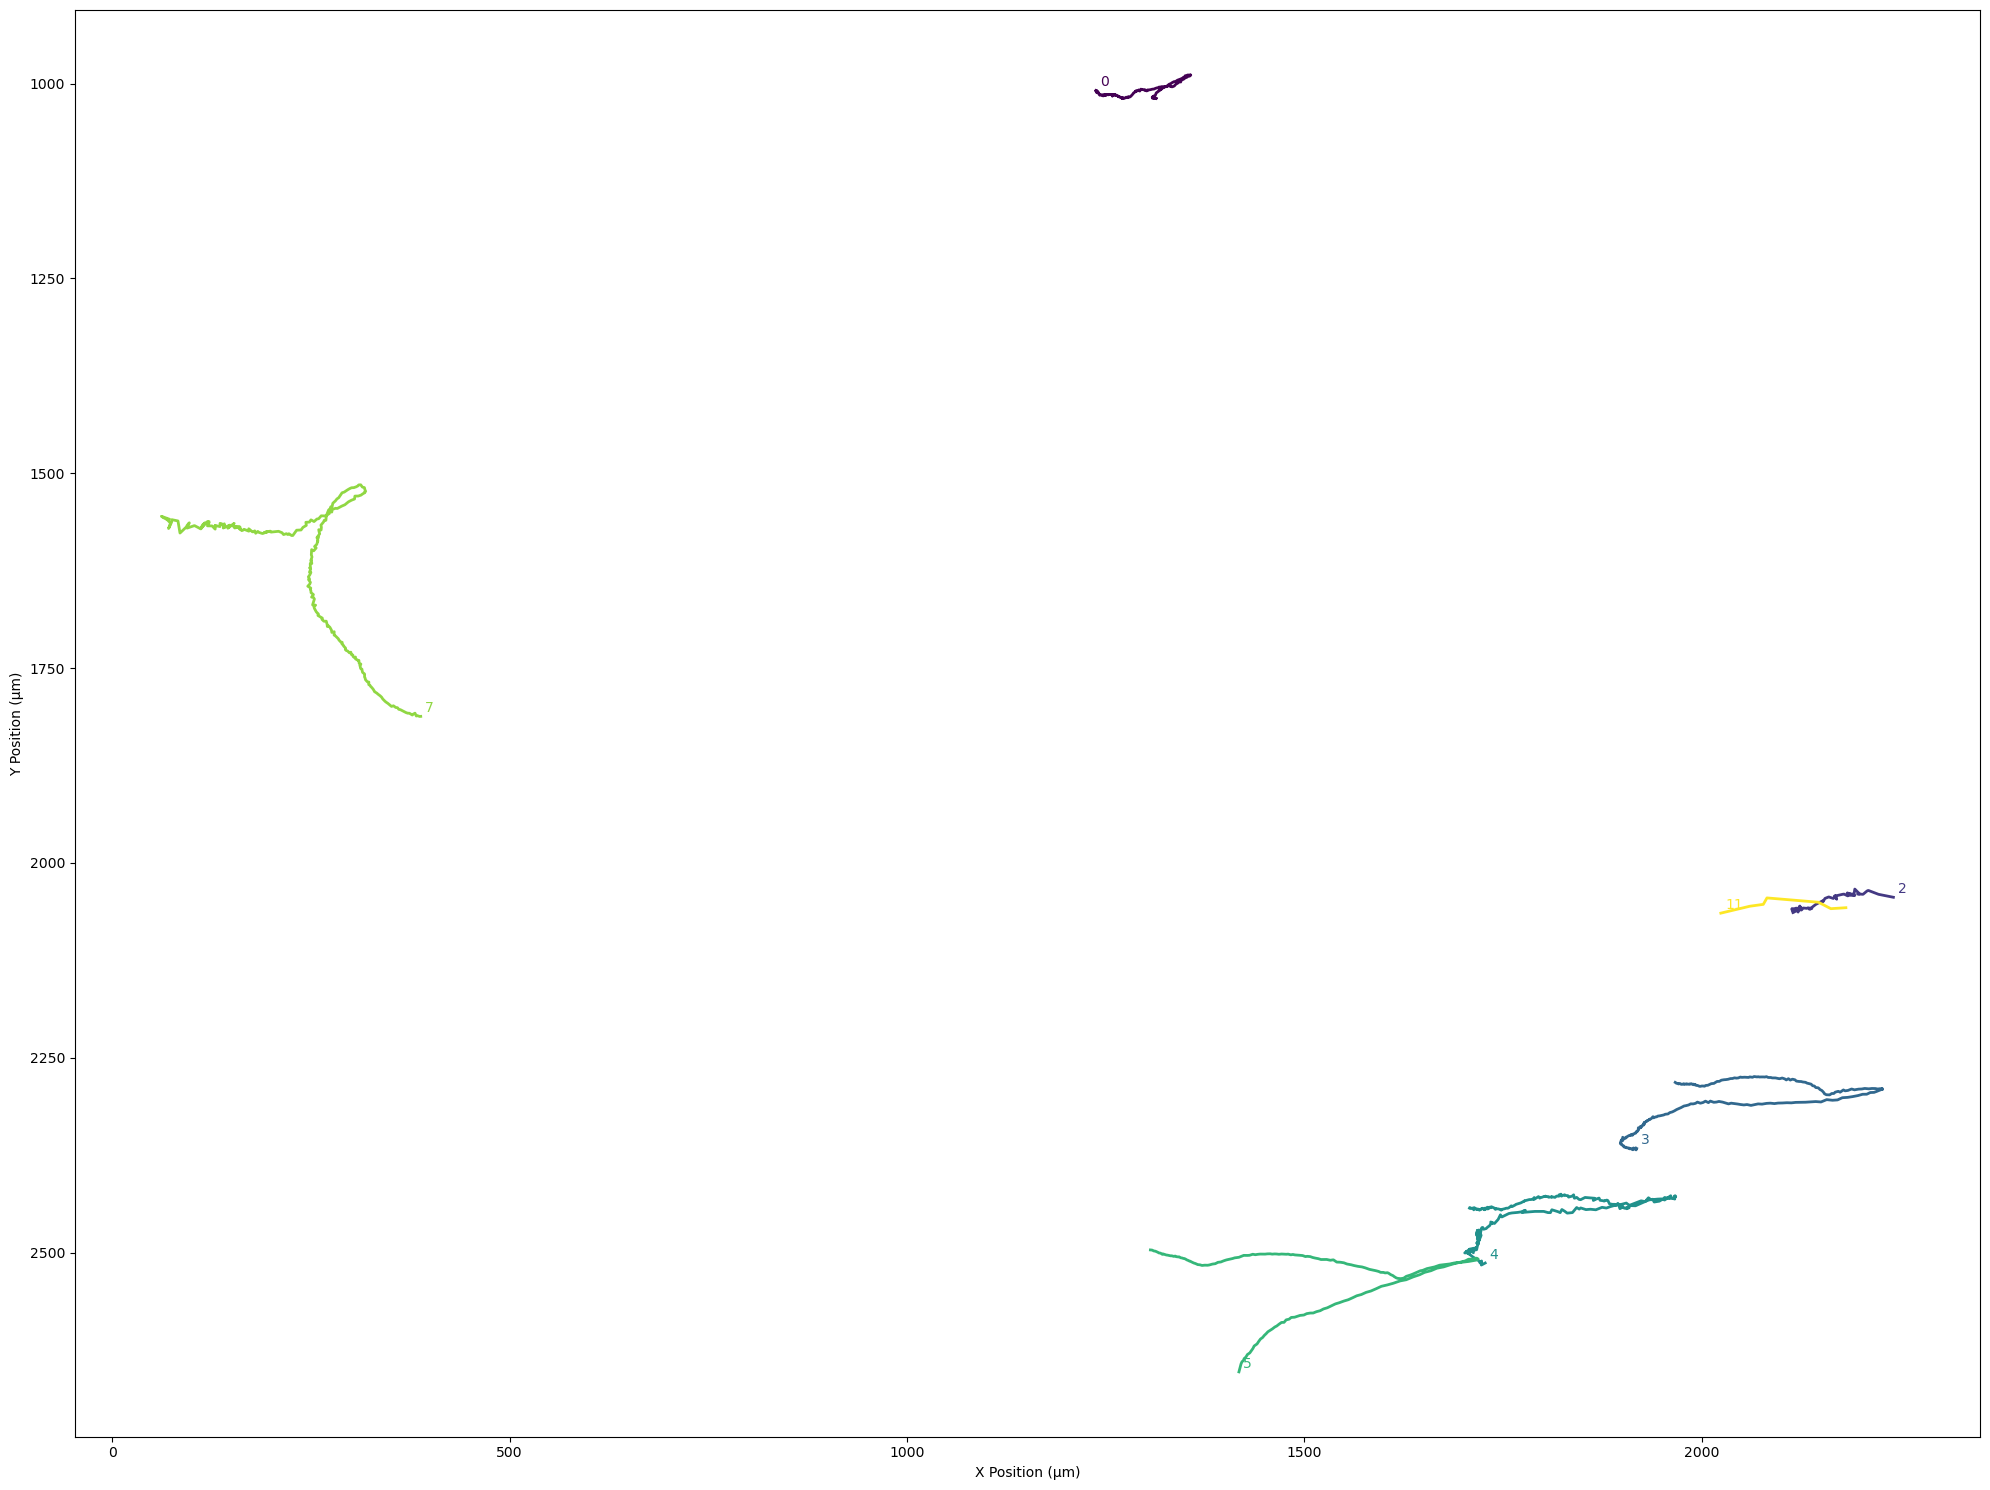

In [53]:
# # Remove particles
#filtered_particles[filtered_particles['particle'] == 4]

# List of particle IDs to remove
particles_to_remove = []  # As an example

# This will create a new DataFrame without the particles with IDs in particles_to_remove
filtered_particles_truncated = filtered_particles_truncated[~filtered_particles_truncated['particle'].isin(particles_to_remove)]

# Create a new DataFrame excluding particles with IDs in particles_to_remove or with IDs greater than 80
# filtered_particles_truncated = filtered_particles[
#     (~filtered_particles['particle'].isin(particles_to_remove)) & 
#     (filtered_particles['particle'] <= 70)
# ]

# # Define the boundaries of the region you're interested in
# x_min, x_max = 1000, 1200  # Replace with your desired values
# y_min, y_max = 700, 1000  # Replace with your desired values

# # Filter particles that are within the specified region
# filtered_particles = filtered_particles[
#     (filtered_particles['x'] >= x_min) & (filtered_particles['x'] <= x_max) &
#     (filtered_particles['y'] >= y_min) & (filtered_particles['y'] <= y_max)
# ]

#plot_trajectories(filtered_particles, microns_per_pixel=1.3, line_width=2)

def plot_trajectories_truncated(data, microns_per_pixel, line_width):
    fig, ax = plt.subplots(figsize=(20, 15))
    unique_particles = np.sort(data['particle'].unique())  # Sort the unique particles
    
    # Adjusted for deprecation warning
    color_map = matplotlib.colormaps['viridis']
    colors = color_map(np.linspace(0, 1, len(unique_particles)))
    
    legend_handles = []  # Initialize the list for legend handles
    legend_labels = []  # Initialize the list for legend labels

    for i, particle in enumerate(unique_particles):
        particle_data = data[data['particle'] == particle]
        
        x_positions = particle_data['x'] * microns_per_pixel
        y_positions = particle_data['y'] * microns_per_pixel
        color = colors[i]
        
        # Plot each particle's trajectory and capture the line handle for the legend
        line, = ax.plot(x_positions, y_positions, linestyle='-', linewidth=line_width, color=color, label=f'Particle {particle}')
        
        # Annotate the last point of each trajectory
        ax.annotate(f'{particle}', xy=(x_positions.iloc[-1], y_positions.iloc[-1]), 
                    xytext=(3, 3), textcoords='offset points', color=color)
        
        # Add particle to the legend
        legend_handles.append(line)
        legend_labels.append(f'Particle {particle}')
        
    ax.invert_yaxis()
    ax.set_xlabel('X Position (µm)')
    ax.set_ylabel('Y Position (µm)')
    #ax.legend(handles=legend_handles, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()
    
# Plot the trajectories of the filtered and truncated particles
plot_trajectories_truncated(filtered_particles_truncated, microns_per_pixel=1.3, line_width=2)

## Draw displacement vs time plot

In [54]:
# def plot_with_ultrasound_burst(ultrasound_burst_frame_value, max_plot_frame):
#     global ultrasound_burst_frame
#     ultrasound_burst_frame = ultrasound_burst_frame_value
    
#     fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))
    
#     for particle, data in particles_data.items():
#         # Find the index of the maximum plot frame for the current particle
#         max_plot_frame_index = np.searchsorted(data['frames'], max_plot_frame, side='right')
        
#         ax1.plot(data['frames'][:max_plot_frame_index], data['distances'][:max_plot_frame_index], label=f'Particle {particle}')
#         ax2.scatter(data['frames'][:max_plot_frame_index], data['distances'][:max_plot_frame_index], label=f'Particle {particle}', s=10)
#         ax3.plot(data['frames'][:max_plot_frame_index], data['speed'][:max_plot_frame_index], label=f'Particle {particle}')
#         #ax4.plot(data['frames'][:max_plot_frame_index], data['confinement_ratio'][:max_plot_frame_index], label=f'Particle {particle}')
    
#     for ax in [ax1, ax2, ax3, ax4]:
#         for burst_frame in range(ultrasound_burst_frame, max_plot_frame + 1, burst_interval_frames):
#             ax.axvline(x=burst_frame, color='k', linestyle='--', linewidth=1)
#         ax.set_xlabel('Frame', fontsize=plot_font_size)
#         ax.set_xlim(0, max_plot_frame)  # Set the x-axis limits to the maximum plot frame
#         ax.grid(True)
#         ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
    
#     ax1.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
#     ax2.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
#     ax1.set_title('Line Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
#     ax2.set_title('Point Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
    
#     ax3.set_ylabel(r'Speed ($\mu m/s$)', fontsize=plot_font_size)
#     ax3.set_title('Speed Over Frames', fontsize=plot_font_size)
    
#     #ax4.set_ylabel('Confinement Ratio', fontsize=plot_font_size)
#     #ax4.set_title('Confinement Ratio Over Frames', fontsize=plot_font_size)
    
#     #ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
#     #ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
#     #ax3.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
#     #ax4.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
    
#     plt.tight_layout()
#     plt.show()

# # Update the interactive output to include the max_plot_frame slider
# max_plot_frame_slider = widgets.IntSlider(
#     value=max_frame,
#     min=0,
#     max=max_frame,
#     step=1,
#     description='Max Plot Frame:',
#     continuous_update=True
# )

# output = widgets.interactive_output(plot_with_ultrasound_burst, {'ultrasound_burst_frame_value': ultrasound_burst_frame_slider, 'max_plot_frame': max_plot_frame_slider})
# display(ultrasound_burst_frame_slider, max_plot_frame_slider, output)

In [55]:
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display
# import numpy as np
# import pandas as pd

# # Constants
# microns_per_pixel = 1.3
# plot_font_size = 18
# tick_font_size = 16
# burst_interval_frames = 30
# fps = 30

# # Assuming 'filtered_particles_truncated' is already loaded with relevant data
# max_frame = filtered_particles_truncated['frame'].max()

# # Preprocess data for each particle
# particles_data = {}
# for particle in filtered_particles_truncated['particle'].unique():
#     particle_data = filtered_particles_truncated[filtered_particles_truncated['particle'] == particle]
#     particles_data[particle] = {
#         'frames': particle_data['frame'].values,
#         'distances': particle_data['total_distance_traveled'].values,
#         'speed': particle_data['speed'].values
#     }

# original_ultrasound_burst_frame = 93
# ultrasound_burst_frame = original_ultrasound_burst_frame

# # Function to plot data for the selected particle
# def plot_with_ultrasound_burst(ultrasound_burst_frame_value, particle_id):
#     fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
    
#     data = particles_data[particle_id]
#     ax1.plot(data['frames'], data['distances'], label=f'Particle {particle_id}')
#     ax2.scatter(data['frames'], data['distances'], label=f'Particle {particle_id}', s=10)
#     ax3.plot(data['frames'], data['speed'], label=f'Particle {particle_id}')

#     for ax in [ax1, ax2, ax3]:
#         for burst_frame in range(ultrasound_burst_frame, max_frame + 1, burst_interval_frames):
#             ax.axvline(x=burst_frame, color='k', linestyle='--', linewidth=1)
#         ax.set_xlabel('Frame', fontsize=plot_font_size)
#         ax.grid(True)
#         ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
    
#     ax1.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
#     ax2.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
#     ax1.set_title('Line Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
#     ax2.set_title('Point Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
    
#     ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
#     plt.tight_layout()
#     plt.show()

# # Widgets for selecting the particle and ultrasound burst frame
# particle_selector = widgets.Dropdown(
#     options=list(particles_data.keys()),
#     value=list(particles_data.keys())[0],
#     description='Particle ID:'
# )

# ultrasound_burst_frame_slider = widgets.IntSlider(
#     value=ultrasound_burst_frame,
#     min=0,
#     max=max_frame,
#     step=1,
#     description='Ultrasound Burst Frame:',
#     continuous_update=True
# )

# output = widgets.interactive_output(
#     plot_with_ultrasound_burst, 
#     {'ultrasound_burst_frame_value': ultrasound_burst_frame_slider, 'particle_id': particle_selector}
# )

# display(particle_selector, ultrasound_burst_frame_slider, output)


In [56]:
filtered_particles_truncated

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,time,dx,dy,displacement,total_distance_traveled,time_interval,speed
0,783.702543,1010.553896,22150.774765,4.340935,0.043582,205.225332,31110.0,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
2,1587.417750,1626.913510,3198.622143,2.990186,0.138896,172.678584,3825.0,0.0,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
3,1755.022335,1512.921240,22303.563669,4.741139,0.113916,202.513103,32640.0,0.0,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
4,1879.143762,1313.751381,7854.615369,3.221400,0.275338,230.539470,9435.0,0.0,0,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
5,1920.409054,1004.894502,26899.887855,5.811351,0.123290,185.335653,44880.0,0.0,0,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,1821.654761,1475.055560,34402.928667,6.091888,0.063880,167.145094,62730.0,0.0,298,3,9.933333,0.405704,1.992086,2.642873,694.048164,0.033333,79.286183
1732,776.260413,952.794548,20580.360339,4.128685,0.049890,210.999995,28050.0,0.0,298,0,9.933333,-0.148216,0.133406,0.259236,282.411619,0.033333,7.777070
1734,1393.760221,298.578258,26070.180392,4.917094,0.129386,193.709804,39270.0,0.0,299,7,9.966667,1.036559,-0.095030,1.353177,944.109630,0.033333,40.595319
1735,775.951470,952.155624,20214.823529,4.103393,0.066653,211.168627,27540.0,0.0,299,0,9.966667,-0.638924,-0.308943,0.922606,283.334225,0.033333,27.678178


In [57]:
# orig code:

# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display
# import numpy as np
# import pandas as pd

# # Assuming 'filtered_particles_truncated' is a DataFrame available in your namespace
# # Constants
# microns_per_pixel = 1.3
# plot_font_size = 18
# tick_font_size = 16
# burst_interval_frames = 30
# # Make sure to set fps = 30 before recalculating speeds and plotting
# fps = 30
# max_frame = filtered_particles_truncated['frame'].max()  # Find the maximum frame to know where to stop the ultrasound lines

# # Calculate displacements between consecutive frames
# filtered_particles_truncated.loc[:, 'dx'] = filtered_particles_truncated.groupby('particle')['x'].diff().fillna(0)
# filtered_particles_truncated.loc[:, 'dy'] = filtered_particles_truncated.groupby('particle')['y'].diff().fillna(0)
# filtered_particles_truncated.loc[:, 'displacement'] = np.sqrt(filtered_particles_truncated['dx']**2 + filtered_particles_truncated['dy']**2) * microns_per_pixel
# filtered_particles_truncated.loc[:, 'total_distance_traveled'] = filtered_particles_truncated.groupby('particle')['displacement'].cumsum()
# filtered_particles_truncated['speed'] = filtered_particles_truncated['displacement'] * fps  # Speed in microns per second

# # Filter the DataFrame to exclude particles with a speed greater than 200 microns per second
# # filtered_particles_truncated = filtered_particles_truncated[filtered_particles_truncated['speed'] <= 100]

# # Filter the DataFrame to include only particles with 'total_distance_traveled' between 100 and 400
# # filtered_particles_truncated = filtered_particles_truncated[
# #     (filtered_particles_truncated['total_distance_traveled'] >= 100) &
# #     (filtered_particles_truncated['total_distance_traveled'] <= 400)
# # ]

# # Preprocess and cache data for each particle
# particles_data = {}
# for particle in filtered_particles_truncated['particle'].unique():
#     particle_data = filtered_particles_truncated[filtered_particles_truncated['particle'] == particle]
#     particles_data[particle] = {
#         'frames': particle_data['frame'].values,
#         'distances': particle_data['total_distance_traveled'].values,
#         'speed': particle_data['speed'].values  # Now in microns per second
#     }

# original_ultrasound_burst_frame = 93
# ultrasound_burst_frame = original_ultrasound_burst_frame

# def plot_with_ultrasound_burst(ultrasound_burst_frame_value):
#     global ultrasound_burst_frame
#     ultrasound_burst_frame = ultrasound_burst_frame_value
#     #print(f"Current ultrasound_burst_frame: {ultrasound_burst_frame}")
    
#     fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
    
#     for particle, data in particles_data.items():
#         ax1.plot(data['frames'], data['distances'], label=f'Particle {particle}')
#         ax2.scatter(data['frames'], data['distances'], label=f'Particle {particle}', s=10)
#         ax3.plot(data['frames'], data['speed'], label=f'Particle {particle}')
    
#     for ax in [ax1, ax2, ax3]:
#         for burst_frame in range(ultrasound_burst_frame, max_frame + 1, burst_interval_frames):
#             ax.axvline(x=burst_frame, color='k', linestyle='--', linewidth=1)
#         ax.set_xlabel('Frame', fontsize=plot_font_size)
#         ax.grid(True)
#         ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
    
#     ax1.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
#     ax2.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
#     ax1.set_title('Line Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
#     ax2.set_title('Point Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
    
#     ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
#     #ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
    
#     plt.tight_layout()
#     plt.show()

# ultrasound_burst_frame_slider = widgets.IntSlider(
#     value=ultrasound_burst_frame,
#     min=0,
#     max=max_frame,
#     step=1,
#     description='Ultrasound Burst Frame:',
#     continuous_update=True
# )

# output = widgets.interactive_output(plot_with_ultrasound_burst, {'ultrasound_burst_frame_value': ultrasound_burst_frame_slider})
# display(ultrasound_burst_frame_slider, output) 

In [58]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd

# Assuming 'filtered_particles_truncated' is a DataFrame available in your namespace
# Constants
microns_per_pixel = 1.3
plot_font_size = 18
tick_font_size = 16
burst_interval_frames = 30
fps = 30  # Frames per second
max_frame = filtered_particles_truncated['frame'].max()  # Find the maximum frame to know where to stop the ultrasound lines

# Calculate the time for each frame
filtered_particles_truncated['time'] = filtered_particles_truncated['frame'] / fps

# Calculate displacements between consecutive frames
filtered_particles_truncated['dx'] = filtered_particles_truncated.groupby('particle')['x'].diff().fillna(0)
filtered_particles_truncated['dy'] = filtered_particles_truncated.groupby('particle')['y'].diff().fillna(0)
filtered_particles_truncated['displacement'] = np.sqrt(filtered_particles_truncated['dx']**2 + filtered_particles_truncated['dy']**2) * microns_per_pixel
filtered_particles_truncated['total_distance_traveled'] = filtered_particles_truncated.groupby('particle')['displacement'].cumsum()

# Calculate the time interval for each frame
filtered_particles_truncated['time_interval'] = filtered_particles_truncated.groupby('particle')['time'].diff().fillna(1/fps)

# Calculate the speed for each particle
filtered_particles_truncated['speed'] = filtered_particles_truncated['displacement'] / filtered_particles_truncated['time_interval']  # Speed in microns per second

# Replace inf values with 0 in speed
filtered_particles_truncated['speed'] = filtered_particles_truncated['speed'].replace([np.inf, -np.inf], 0)

# Preprocess and cache data for each particle
particles_data = {}
for particle in filtered_particles_truncated['particle'].unique():
    particle_data = filtered_particles_truncated[filtered_particles_truncated['particle'] == particle]
    particles_data[particle] = {
        'frames': particle_data['frame'].values,
        'distances': particle_data['total_distance_traveled'].values,
        'speed': particle_data['speed'].values  # Now in microns per second
    }

original_ultrasound_burst_frame = 93
ultrasound_burst_frame = original_ultrasound_burst_frame

def plot_with_ultrasound_burst(ultrasound_burst_frame_value):
    global ultrasound_burst_frame
    ultrasound_burst_frame = ultrasound_burst_frame_value
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
    
    for particle, data in particles_data.items():
        ax1.plot(data['frames'], data['distances'], label=f'Particle {particle}')
        ax2.scatter(data['frames'], data['distances'], label=f'Particle {particle}', s=10)
        ax3.plot(data['frames'], data['speed'], label=f'Particle {particle}')
    
    for ax in [ax1, ax2, ax3]:
        for burst_frame in range(ultrasound_burst_frame, max_frame + 1, burst_interval_frames):
            ax.axvline(x=burst_frame, color='k', linestyle='--', linewidth=1)
        ax.set_xlabel('Frame', fontsize=plot_font_size)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
    
    ax1.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
    ax2.set_ylabel(r'Total Distance Traveled ($\mu m$)', fontsize=plot_font_size)
    ax3.set_ylabel(r'Speed ($\mu m$/s)', fontsize=plot_font_size)
    ax1.set_title('Line Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
    ax2.set_title('Point Profile of Total Distance Traveled Over Frames', fontsize=plot_font_size)
    ax3.set_title('Speed Profile Over Frames', fontsize=plot_font_size)
    
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize='small')
    
    plt.tight_layout()
    plt.show()

ultrasound_burst_frame_slider = widgets.IntSlider(
    value=ultrasound_burst_frame,
    min=0,
    max=max_frame,
    step=1,
    description='Ultrasound Burst Frame:',
    continuous_update=True
)

output = widgets.interactive_output(plot_with_ultrasound_burst, {'ultrasound_burst_frame_value': ultrasound_burst_frame_slider})
display(ultrasound_burst_frame_slider, output)


IntSlider(value=93, description='Ultrasound Burst Frame:', max=299)

Output()

## Draw trackmate like overlays (keep everything as is for Andrew; mp4 no compression)

In [59]:
def draw_particles_on_frame(frame, particles_df, frame_index, ultrasound_burst_frame, burst_interval_frames, burst_duration_frames, radius=12, color=(0, 255, 0), thickness=2, label_particles=False, show_ultrasound_burst=True):
    """
    Draw circles around detected particles on the frame with only the outline colored and optionally label them.
    Also, conditionally add an annotation for the ultrasound burst at the top left of the frame every second for a duration of 300 ms, based on the show_ultrasound_burst flag.

    Args:
    - frame (numpy.ndarray): The video frame.
    - particles_df (pandas.DataFrame): DataFrame with particle data, including 'x' and 'y' columns.
    - ultrasound_burst_frame, burst_interval_frames, burst_duration_frames: Parameters for controlling ultrasound burst annotations.
    - radius (int): Radius of the circle to draw for each particle.
    - color (tuple): Color of the circle's outline in BGR format.
    - thickness (int): Thickness of the circle's outline. Positive values indicate the outline's thickness, while a negative value would fill the circle.
    - label_particles (bool): Whether to label the particles with their ID or not.
    - show_ultrasound_burst (bool): Whether to show the ultrasound burst annotation or not.
    """
    if show_ultrasound_burst and frame_index >= ultrasound_burst_frame:
        frames_elapsed = frame_index - ultrasound_burst_frame
        if frames_elapsed % burst_interval_frames < burst_duration_frames:
            ultrasound_burst_number = frames_elapsed // burst_interval_frames + 1
            annotation_text = f"Ultrasound Burst {ultrasound_burst_number}"
            cv2.putText(frame, annotation_text, (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 2)  # Adjust text position and size as needed

    for _, row in particles_df.iterrows():
        center = (int(row['x']), int(row['y']))  # Center of the circle
        cv2.circle(frame, center, radius, color, thickness)  # Draw circle outline

        if label_particles:
            # Adjust text position so it doesn't overlap with the circle
            text_position = (center[0] + radius, center[1] + radius)
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 2
            font_color = (255, 255, 255)  # White color for the text
            line_type = 2
            cv2.putText(frame, str(int(row['particle'])), text_position, font, font_scale, font_color, line_type)

    return frame
    
def generate_color_map(unique_particles):
    # Generate a unique color for each particle and store it in a dictionary
    color_map = {}
    for particle in unique_particles:
        color_map[particle] = (int(np.random.choice(range(256))), 
                               int(np.random.choice(range(256))), 
                               int(np.random.choice(range(256))))
    return color_map

def draw_trajectories(frame, particles_df, color_map):
    unique_particles = particles_df['particle'].unique()
    
    for particle_id in unique_particles:
        color = color_map[particle_id]  # Retrieve the color for the current particle
        
        particle_trajectory = particles_df[particles_df['particle'] == particle_id]
        particle_trajectory = particle_trajectory.sort_values(by='frame')
        for i in range(1, len(particle_trajectory)):
            pt1 = (int(particle_trajectory.iloc[i-1]['x']), int(particle_trajectory.iloc[i-1]['y']))
            pt2 = (int(particle_trajectory.iloc[i]['x']), int(particle_trajectory.iloc[i]['y']))
            cv2.line(frame, pt1, pt2, color, 3)

    return frame

def draw_scale_bar(frame, pixel_size_microns=1.3, scale_bar_length_microns=100, color=(255, 255, 255), bar_height=100): # bar_height was 10 originally
    """
    Draw a rectangular scale bar on the frame.

    Args:
    - frame (numpy.ndarray): The video frame.
    - pixel_size_microns (float): Size of one pixel in microns.
    - scale_bar_length_microns (int): Desired length of the scale bar in microns.
    - color (tuple): Color of the scale bar in BGR format.
    - bar_height (int): Height of the scale bar in pixels.
    """
    scale_bar_pixels = int(scale_bar_length_microns / pixel_size_microns)  # Convert scale bar length from microns to pixels
    height, width = frame.shape[:2]
    
    # Define the top-left and bottom-right points of the rectangle
    top_left_point = (width - scale_bar_pixels - 10, height - bar_height - 10)  # 10 pixels from the right edge and bottom, bar height above the bottom
    bottom_right_point = (width - 10, height - 10)  # 10 pixels from the right edge and bottom
    
    # Draw the rectangle
    cv2.rectangle(frame, top_left_point, bottom_right_point, color, cv2.FILLED)  # Use cv2.FILLED to fill the rectangle

## Preview video

In [60]:
def preview_video(thresholded_frames_array, filtered_particles, particles_spot_filtered, ultrasound_burst_frame, burst_interval_frames, burst_duration_frames):
    height, width = thresholded_frames_array[0].shape[:2]
    unique_particles = filtered_particles['particle'].unique()
    color_map = generate_color_map(unique_particles)

    # Reset the index of filtered_particles if 'frame' is an index
    if filtered_particles.index.name == 'frame':
        filtered_particles = filtered_particles.reset_index(drop=True)

    # Pre-compute frames with overlays
    frames_with_overlays = {}
    for frame_index in range(len(thresholded_frames_array)):
        frame = cv2.cvtColor(thresholded_frames_array[frame_index], cv2.COLOR_GRAY2BGR)
        frame_with_trajectories = frame.copy()
        frame_with_trajectories = draw_trajectories(frame_with_trajectories, filtered_particles, color_map)
        frame_particles = filtered_particles[filtered_particles['frame'] == frame_index]
        frame_spots = particles_spot_filtered[particles_spot_filtered['frame'] == frame_index]
        frame_with_overlays = draw_particles_on_frame(frame_with_trajectories, frame_particles, frame_index, ultrasound_burst_frame, burst_interval_frames, burst_duration_frames, color=(0, 0, 255), label_particles=True)
        frame_with_overlays = draw_particles_on_frame(frame_with_overlays, frame_spots, frame_index, ultrasound_burst_frame, burst_interval_frames, burst_duration_frames, color=(0, 0, 255))
        draw_scale_bar(frame_with_overlays)
        frames_with_overlays[frame_index] = frame_with_overlays

    cv2.namedWindow("Video Preview", cv2.WINDOW_NORMAL)
    screen_width = 512  # Set the desired screen width
    screen_height = 512 # Set the desired screen height
    cv2.resizeWindow("Video Preview", screen_width, screen_height)

    cv2.createTrackbar("Frame", "Video Preview", 0, len(thresholded_frames_array) - 1, lambda x: None)

    prev_frame_index = -1
    while True:
        frame_index = cv2.getTrackbarPos("Frame", "Video Preview")
        if frame_index != prev_frame_index:
            frame_with_overlays = frames_with_overlays[frame_index]
            cv2.imshow("Video Preview", frame_with_overlays)
            prev_frame_index = frame_index

        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break

    cv2.destroyAllWindows()

# Load your data for thresholded_frames_array, filtered_particles, and particles_spots_filtered here
# Ensure the data frames and arrays are correctly loaded and match the expected structure

# Reset the index of filtered_particles_truncated if 'frame' is an index
if filtered_particles_truncated.index.name == 'frame':
    filtered_particles_truncated = filtered_particles_truncated.reset_index(drop=True)

# Preview the video
preview_video(thresholded_frames_array=thresholded_frames_array,
              filtered_particles=filtered_particles_truncated,
              particles_spot_filtered=particles_spot_filtered,
              ultrasound_burst_frame=ultrasound_burst_frame-2,
              burst_interval_frames=burst_interval_frames,
              burst_duration_frames=10)

## Save video with original particle numbers

In [61]:
import os
import cv2

def create_new_filename(filename):
    base_name, extension = os.path.splitext(filename)
    counter = 1
    new_filename = filename

    while os.path.exists(new_filename):
        new_filename = f"{base_name}_{counter}{extension}"
        counter += 1

    return new_filename

# Save video with resolution

def save_video(thresholded_frames_array, filtered_particles, particles_spot_filtered, output_file, fps, ultrasound_burst_frame, burst_interval_frames, burst_duration_frames):
    output_width = 2048
    output_height = 2048

    video_writer = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc(*'mp4v'), fps, (output_width, output_height))

    # Generate color_map using the final set of unique particles
    unique_particles = filtered_particles['particle'].unique()
    color_map = generate_color_map(unique_particles)

    if not video_writer.isOpened():
        print(f"Failed to open video writer. The video will not be saved.")
    else:
        for frame_index in range(len(thresholded_frames_array)):
            frame = cv2.cvtColor(thresholded_frames_array[frame_index], cv2.COLOR_GRAY2BGR)
            frame_with_trajectories = frame.copy()
            frame_with_trajectories = draw_trajectories(frame_with_trajectories, filtered_particles, color_map)
            frame_particles = filtered_particles[filtered_particles['frame'] == frame_index]
            frame_spots = particles_spot_filtered[particles_spot_filtered['frame'] == frame_index]
            frame_with_overlays = draw_particles_on_frame(frame_with_trajectories, frame_particles, frame_index, ultrasound_burst_frame, burst_interval_frames, burst_duration_frames, color=(0, 0, 255), label_particles=True)
            frame_with_overlays = draw_particles_on_frame(frame_with_overlays, frame_spots, frame_index, ultrasound_burst_frame, burst_interval_frames, burst_duration_frames, color=(0, 0, 255))
            
            # Draw the scale bar on the frame with overlays
            draw_scale_bar(frame_with_overlays)

            # Resize the frame to the desired output resolution
            frame_with_overlays_resized = cv2.resize(frame_with_overlays, (output_width, output_height))
            
            video_writer.write(frame_with_overlays_resized)

        video_writer.release()
        print(f"Video saved as {output_file}")

#Assume tif_file_path is defined and holds the path to the single TIFF file selected
#If tif_file_path is not yet defined, you'll need to ensure it is defined by your folder/file selection logic

# # Extract the directory of the TIFF file to use as the base for creating the "Extracted Channel Images" folder
# tif_directory = os.path.dirname(tif_file_path)

# # Create the "Extracted Channel Images" folder within the same directory as the TIFF file
# extracted_images_directory_path = os.path.join(tif_directory, 'Extracted Channel Images')
# os.makedirs(extracted_images_directory_path, exist_ok=True)

# # Inside the "Extracted Channel Images" folder, create a subfolder for AVI files if needed
# avi_directory_path = os.path.join(extracted_images_directory_path, 'avi')
# os.makedirs(avi_directory_path, exist_ok=True)

# # Construct the output file path
# file_name = os.path.basename(tif_file_path).replace('.tif', '.mp4')  # Change the extension from .tif to .mp4
# output_file = os.path.join(avi_directory_path, file_name)

# # Use the create_new_filename function to avoid overwriting existing files
# output_file = create_new_filename(output_file)

fps = 30
microns_per_pixel = 1.3
scale_length_microns = 100
#save_video(thresholded_frames_array, filtered_particles_truncated, particles_spot_filtered, output_file, fps, ultrasound_burst_frame=ultrasound_burst_frame-2, burst_interval_frames=30, burst_duration_frames=10)

## Save video with ordered particle number 0, 1, 2, 3 etc.

In [62]:
# Assuming filtered_particles is your main DataFrame that contains 'particle' column

# Generate a sorted list of unique particles
unique_particles_sorted = np.sort(filtered_particles_truncated['particle'].unique())

# Create a mapping from the original particle ID to a sequential ID starting from 1
particle_id_mapping = {original_id: new_id for new_id, original_id in enumerate(unique_particles_sorted, start=1)}

# Add a new column to the DataFrame with the mapped IDs
filtered_particles_truncated['particle'] = filtered_particles_truncated['particle'].map(particle_id_mapping)

In [63]:
# # Assuming filtered_particles is your main DataFrame that contains 'particle' column

# # Generate a sorted list of unique particles
# unique_particles_sorted = np.sort(filtered_particles['particle'].unique())

# # Create a mapping from the original particle ID to a sequential ID starting from 1
# particle_id_mapping = {original_id: new_id for new_id, original_id in enumerate(unique_particles_sorted, start=1)}

# # Add a new column to the DataFrame with the mapped IDs
# filtered_particles['sequential_id'] = filtered_particles['particle'].map(particle_id_mapping)

def draw_particles_with_sequential_ids(frame, particles_df, radius, color, thickness, label_particles):
    # This wrapper function modifies the 'particles_df' dataframe to use 'sequential_id' for labeling
    if label_particles:
        # Use the 'sequential_id' if we are labeling particles
        particles_df = particles_df.copy()
        particles_df['particle'] = particles_df['sequential_id']
    
    # Call the original function with the modified dataframe
    return draw_particles_on_frame(frame, particles_df, radius, color, thickness, label_particles)

# Assuming 'folder_path' is defined somewhere in your code and points to the base file path

# Extract the base directory up to the 'Compilation' level from the XML file path
base_path = os.path.dirname(os.path.dirname(os.path.dirname(tif_file_path)))  # This moves up two levels from the 'tiff' directory

# Define the directory where the MP4 files will be saved within 'Compilation'
mp4_directory_path = os.path.join(base_path, 'Compilation', 'mp4')  # Consider renaming this directory to 'videos' or similar for clarity

# Ensure the MP4 directory exists
os.makedirs(mp4_directory_path, exist_ok=True)

# Extract the relevant part from the TIF file name
base_file_name = os.path.basename(tif_file_path)
file_prefix = base_file_name.split('_MMStack')[0]

# Create the new base file name
new_base_file_name = f"{file_prefix}_ordered_particles.mp4"

# Create a function to generate a unique file name
def create_new_filename(path):
    counter = 1
    output_path = path
    while os.path.exists(output_path):
        base, ext = os.path.splitext(path)
        output_path = f"{base}_{counter}{ext}"
        counter += 1
    return output_path

# Generate a full path for the new file
output_file_ordered = create_new_filename(os.path.join(mp4_directory_path, new_base_file_name))

# Now, 'output_file_ordered' contains a path to a file that is unique and correctly ends with '.mp4'
# You can proceed to save the video using 'output_file_ordered'

# Example usage with specified video size and all arguments as keywords
save_video(thresholded_frames_array=thresholded_frames_array,
           filtered_particles=filtered_particles_truncated,
           particles_spot_filtered=particles_spot_filtered,
           output_file=output_file_ordered,
           fps=fps,
           ultrasound_burst_frame=ultrasound_burst_frame-2,
           burst_interval_frames=30,
           burst_duration_frames=10)

Video saved as E:\Particle tracking\Summer Semester Jun-Aug 2024\14JUL24\Cycle study\0 cycles\150 mVpp\Compilation\mp4\240 cycles_ordered_particles.mp4


### View overlayed spots and trajectories in media player

In [64]:
# import os

# # Command to open the video file with the default app associated with .mp4 files
# command = f'start "" "{output_file}"'

# # Execute the command
# os.system(command)

### Export tracks as xml

In [65]:
import os
import numpy as np
import xml.etree.ElementTree as ET
import xml.dom.minidom

# Function to prettify XML
def prettify_xml(element):
    rough_string = ET.tostring(element, 'utf-8')
    reparsed = xml.dom.minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

# Function to add elements to XML
def add_particle_elements(parent_element, row):
    for column, value in row.items():
        column_element = ET.SubElement(parent_element, column)
        # Format the text depending on data type or column name
        if column == 'particle':
            column_element.text = str(int(value))  # Ensure particle number is an integer
        elif isinstance(value, float):
            column_element.text = f"{value:.4f}"  # Format floats to 4 decimal places
        else:
            column_element.text = str(value)

# Copy the DataFrame to normalize particle identifiers
normalized_particles_df = filtered_particles_truncated.copy()

# Normalize particle identifiers
unique_particle_ids = np.sort(normalized_particles_df['particle'].unique())
particle_id_to_normalized_id = {original_id: new_id for new_id, original_id in enumerate(unique_particle_ids, start=1)}
normalized_particles_df['particle'] = normalized_particles_df['particle'].map(particle_id_to_normalized_id)

# Extract the base directory up to the 'Compilation' level from the XML file path
# base_path = os.path.dirname(os.path.dirname(os.path.dirname(tif_file_path)))  # Moves up three levels from the 'xml' directory

# Construct the path to the 'xml' directory within 'Compilation'
xml_directory_path = os.path.join(base_path, 'Compilation', 'xml')
os.makedirs(xml_directory_path, exist_ok=True)  # Ensure the 'xml' directory exists, create if it does not

# Define and normalize the XML file path
base_file_name = os.path.basename(tif_file_path)
file_prefix = base_file_name.split('_MMStack')[0]  # Extract the part before '_MMStack'
xml_file_name = file_prefix + '.xml'  # Create the XML file name
xml_file_path = os.path.normpath(os.path.join(xml_directory_path, xml_file_name))

# Create an ElementTree object
root = ET.Element('ParticleData')
ultrasound_burst_frame_element = ET.SubElement(root, 'UltrasoundBurstFrame')
ultrasound_burst_frame_element.text = str(ultrasound_burst_frame)

# Create the Particles element and add it to the root
particles_element = ET.SubElement(root, 'Particles')
normalized_particles_df.reset_index(drop=True, inplace=True)  # Reset the index of the DataFrame

# Iterate over the DataFrame rows to create XML elements
for _, row in normalized_particles_df.iterrows():
    particle_element = ET.SubElement(particles_element, 'Particle')
    add_particle_elements(particle_element, row)  # Assuming a function 'add_particle_elements' is defined elsewhere

# Function to generate a pretty XML string
def prettify_xml(element):
    from xml.dom import minidom
    rough_string = ET.tostring(element, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent=" ")

# Generate pretty XML string and write to file
try:
    xml_string = prettify_xml(root)
    with open(xml_file_path, 'w') as file:
        file.write(xml_string)
    print(f'Filtered particles exported to XML at {xml_file_path}')
except Exception as e:
    print(f"An error occurred while writing the file: {e}")

Filtered particles exported to XML at E:\Particle tracking\Summer Semester Jun-Aug 2024\14JUL24\Cycle study\0 cycles\150 mVpp\Compilation\xml\240 cycles.xml


### Save videos as h5py file for simulating training

In [66]:
import os
import h5py
import numpy as np

# Extract the base directory for the 'Compilation' folder
base_path = os.path.dirname(os.path.dirname(os.path.dirname(tif_file_path))) # Move up two levels from the XML file

# Specify the directory where the 'Training Data' folder will be inside 'Compilation'
compilation_path = os.path.join(base_path, "Compilation", "Training Data")

# Create the 'Training Data' directory if it does not exist
if not os.path.exists(compilation_path):
    os.makedirs(compilation_path)

# Define and normalize the HDF5 file path
base_file_name = os.path.basename(tif_file_path)
file_prefix = base_file_name.split('_MMStack')[0] # Extract the part before '_MMStack'
hdf5_file_name = file_prefix + '.h5' # Create the HDF5 file name
hdf5_file_path = os.path.normpath(os.path.join(compilation_path, hdf5_file_name))

# Create a new HDF5 file and save data
with h5py.File(hdf5_file_path, 'w') as f:
    # Assuming 'filtered_particles', 'particles_spot_filtered', 'thresholded_frames_array', and 'ultrasound_burst_frame' are defined
    # Save particle trajectories
    f.create_dataset('particle_trajectories', data=filtered_particles.to_numpy())
    
    # Save particle spots
    f.create_dataset('particle_spots', data=particles_spot_filtered.to_numpy())
    
    # Save pixel intensities
    f.create_dataset('pixel_intensities', data=thresholded_frames_array)
    
    # Save pixel intensities
    #f.create_dataset('8_bit', data=frames_original_stack)
    
    # Save pixel intensities
    f.create_dataset('original_data', data=frames)
    
    # Save ultrasound burst frame
    f.create_dataset('ultrasound_burst_frame', data=ultrasound_burst_frame)

### View overlayed spots and trajectories in napari

In [ ]:
# # Initialize napari viewer
# viewer = napari.Viewer()

# # Function to draw circles around detected particles based on the current frame
# def draw_circles(frame_number, diameter):
#     # Remove the existing layer of circles if it exists
#     if 'Detected Particles' in viewer.layers:
#         viewer.layers.remove('Detected Particles')
    
#     # Get the particles for the current frame
#     current_frame_particles = particles[particles['frame'] == frame_number]

#     if current_frame_particles.empty:
#         return  # If there are no particles, there's nothing to draw
    
#     # Calculate the radius from the diameter
#     radius = diameter / 2.0
    
#     # Create a list of bounding box corners for each ellipse
#     ellipses = [
#         np.array([[row['y'] - radius, row['x'] - radius],
#                   [row['y'] - radius, row['x'] + radius],
#                   [row['y'] + radius, row['x'] + radius],
#                   [row['y'] + radius, row['x'] - radius]])
#         for index, row in current_frame_particles.iterrows()
#     ]
    
#     # Add the shapes layer to the napari viewer with thicker, darker edges
#     if ellipses:
#         viewer.add_shapes(ellipses, shape_type='ellipse', edge_color='darkred', edge_width=2, name='Detected Particles')

# # Draw trajectories function
# def draw_trajectories(filtered_particles):
#     # Generate valid trajectories
#     valid_trajectories = [
#         group[['y', 'x']].values.astype(np.float32)
#         for particle_id, group in filtered_particles.groupby('particle') if len(group) >= 2
#     ]
    
#     # Check if the 'Trajectories' layer exists, and create or update it accordingly
#     if 'Trajectories' in viewer.layers:
#         viewer.layers['Trajectories'].data = valid_trajectories
#     else:
#         viewer.add_shapes(valid_trajectories, shape_type='path', edge_color='cyan', edge_width=1, name='Trajectories')

# # Add the original thresholded frames to napari for comparison
# viewer.add_image(thresholded_frames_array, name='Thresholded Frames')

# # Initial call to draw trajectories
# draw_trajectories(filtered_particles)

# # Connect the viewer update for the current frame
# @viewer.dims.events.current_step.connect
# def on_current_step(event):
#     frame_number = viewer.dims.current_step[0]
#     # Assuming a fixed diameter for now, as it's not updated dynamically in this snippet
#     draw_circles(frame_number, diameter)

# # Run napari
# napari.run()

### Compute drift

In [ ]:
# # Compute the drift using trackpy
# d = tp.compute_drift(particles_linked_filtered)

# # Create a figure object and store its handle in a variable
# fig2 = plt.figure()

# # Use the plot method on the dataframe 'd'. 
# # Since 'd' is a DataFrame, it has a 'plot' method that can be used directly.
# # If 'd.plot()' does not automatically pick up the figure,
# # you can explicitly pass the current axes to the plot function.
# ax2 = fig2.gca()  # Get the current axes of the figure
# d.plot(ax=ax2)   # Plot 'd' on the current axes

# # Show the figure
# plt.show()

### Histogram values for particles dataframe

In [ ]:
#particles

### Histogram values for individual frames

In [ ]:
# import tkinter as tk
# from tkinter import ttk
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# import pandas as pd
# import numpy as np
# import trackpy as tp

# # Function to draw histograms for a specific frame
# def draw_histograms(frame_number):
#     plt.close('all')  # Close any existing plots to avoid memory issues
#     current_frame_particles = particles[particles['frame'] == frame_number]
    
#     fig, axs = plt.subplots(1, 4, figsize=(16, 4))
#     properties = ['mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep']
    
#     for ax, prop in zip(axs, properties):
#         ax.hist(current_frame_particles[prop], bins=10, color='skyblue', edgecolor='black')
#         ax.set_title(f'{prop} histogram')
#         ax.set_xlabel(prop)
#         ax.set_ylabel('Frequency')
    
#     plt.tight_layout()
#     return fig

# # Tkinter GUI setup
# root = tk.Tk()
# root.title("Particle Analysis")

# # Frame selection slider
# frame_slider_label = ttk.Label(root, text="Select Frame:")
# frame_slider_label.grid(column=0, row=0, sticky='w')

# # Dynamic label to show the current frame
# current_frame_label = ttk.Label(root, text="Frame: 0")
# current_frame_label.grid(column=2, row=0, sticky='w')

# frame_slider = ttk.Scale(root, from_=particles['frame'].min(), to=particles['frame'].max(), orient='horizontal', command=lambda s: current_frame_label.configure(text=f"Frame: {int(float(s))}"))
# frame_slider.grid(column=1, row=0, sticky='ew')

# # Canvas for matplotlib plots
# canvas_frame = tk.Frame(root)
# canvas_frame.grid(column=0, row=3, columnspan=3, sticky='ew')

# # Update histograms based on the selected frame
# def update_button_command():
#     for widget in canvas_frame.winfo_children():
#         widget.destroy()  # Clear the previous plot
    
#     frame_number = int(frame_slider.get())
#     fig = draw_histograms(frame_number)
#     canvas = FigureCanvasTkAgg(fig, master=canvas_frame)  # A tk.DrawingArea.
#     canvas.draw()
#     canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

# # Button to trigger histogram update
# update_button = ttk.Button(root, text="Update Histograms", command=update_button_command)
# update_button.grid(column=0, row=1, columnspan=3, pady=10)

# root.mainloop()
